<a href="https://colab.research.google.com/github/barubdg/DictaduraCubana_ONU_SentimentAnalysis/blob/main/SentimentAnalysis/An%C3%A1lisis_de_sentimiento_Elecci%C3%B3n_Cubana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOR**

**Baruch Benjamin Dámazo Gálvez**

Estudiante de ingeniería de Software (UTP)

# **1. DEFINICIÓN DEL PROBLEMA**

**Análisis de Sentimiento: La Elección de Cuba en el Consejo de Derechos Humanos de la ONU**

**Post de Twitter de UHN Plus**

ESCANDALOSO: La dictadura cubana, con más de 1000 presos políticos, ha sido elegida miembro del Consejo de Derechos Humanos de la ONU, representando a América Latina. Cuestionable decisión de las Naciones Unidas.

# **2. CONSTRUCCIÓN DEL DATASET**

## **2.1 IMPORTACION DE LIBRERIAS**

-----
**Importación de librerias a utilizar**

1. **NumPy (np):** Biblioteca fundamental para la computación numérica en Python. Proporciona soporte para arrays y matrices, así como funciones matemáticas para operar en estos datos.

2. **Pandas (pd):** Herramientas de análisis y manipulación de datos. Ofrece estructuras de datos flexibles para trabajar con datos tabulares, como DataFrames.

3. **Matplotlib.pyplot (plt):** Librería de visualización que proporciona herramientas para crear gráficos y visualizaciones estáticas.

4. **WordCloud:** Librería específica para la creación de nubes de palabras a partir de un conjunto de texto, donde las palabras más frecuentes aparecen más grandes.

5. **Seaborn (sns):** Basada en Matplotlib, Seaborn es otra librería de visualización de datos que simplifica la creación de gráficos estadísticos atractivos.

6. **Matplotlib (mpl):** Biblioteca de trazado 2D en Python que produce figuras de calidad en una variedad de formatos y entornos.

7. **re (Regular Expression):** Módulo de expresiones regulares para manipulación y búsqueda de patrones en cadenas de texto.

8. **TextBlob:** Herramienta de procesamiento de lenguaje natural (NLP) que simplifica tareas como análisis de sentimientos, extracción de frases clave, etc.

9. **Plotly Express (px):** Librería para la creación de gráficos interactivos y visualizaciones web.

10. **Requests:** Módulo para enviar solicitudes HTTP en Python.

11. **NLTK (Natural Language Toolkit):** Librería para procesamiento de lenguaje natural. Proporciona herramientas para trabajar con texto y realizar tareas como tokenización, stemming, etc.

12. **Scipy.spatial.distance:** Módulo de SciPy para cálculos de distancias entre puntos.

13. **Random:** Módulo para generación de números aleatorios y manipulación de secuencias.

14. **Scikit-learn (sklearn):** Librería de aprendizaje automático (machine learning) que proporciona herramientas simples y eficientes para la minería y el análisis de datos.

    - **TfidfVectorizer:** Convierte una colección de documentos en una matriz de características TF-IDF.
    - **train_test_split:** Divide conjuntos de datos en conjuntos de entrenamiento y prueba.
    - **resample:** Utilizado para el re-muestreo de conjuntos de datos.

15. **RandomForestClassifier:** Implementación de un clasificador de bosques aleatorios.

16. **GridSearchCV:** Herramienta para realizar búsqueda exhaustiva de hiperparámetros a través de una cuadrícula de valores.

17. **SVC (Support Vector Classifier):** Implementación de una máquina de soporte vectorial para clasificación.

18. **LinearSVC:** Implementación de una máquina de soporte vectorial lineal para clasificación.

19. **CountVectorizer y TfidfTransformer:** Transformadores para convertir datos de texto en matrices numéricas para su uso en modelos de aprendizaje automático.

20. **Pipeline:** Estructura que permite concatenar múltiples pasos en un proceso de aprendizaje automático.

21. **Accuracy, classification_report, recall_score, f1_score, precision_score:** Métricas para evaluar el rendimiento de los modelos de clasificación.

22. **Confusion_matrix:** Matriz de confusión para evaluar el rendimiento de un algoritmo de clasificación.

In [ ]:
# Librerías básicas
import numpy as np
import pandas as pd
import re
import random
import requests

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px

# Procesamiento de texto y NLP
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Análisis de texto y procesamiento
from scipy.spatial.distance import cosine

# Machine Learning - Preprocesamiento de texto
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Machine Learning - Modelos y evaluación
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **2.2 CARGA DEL DATASET**

---
**Lectura de las 5 primeras filas del Dataset (Data-Eleccion-ONU-CUBA)**

> Se carga los datos desde un archivo de Excel llamado "Data-Eleccion-ONU-Cuba.xlsx" en un DataFrame de pandas llamado Data_Eleccion y luego muestra las primeras 5 filas de ese DataFrame.

In [ ]:
Data_Eleccion =pd.read_excel("/content/Data-Eleccion-ONU-Cuba.xlsx")
Data_Eleccion.head(5)

,Título,Imagen,css1dbjc4n_URL,css901oao,css4rbku5_URL,css4rbku5,css901oao1,css4rbku5_URL2,css901oao3,css4rbku54
0,UHN Plus,https://pbs.twimg.com/profile_images/170323624...,NaN,@UHN_Plus,NaN,NaN,NaN,NaN,587.0,NaN
1,BuqueInsignia,https://pbs.twimg.com/profile_images/169946709...,https://twitter.com/Erpintos,@Erpintos,https://twitter.com/Erpintos/status/1711777321...,10 oct.,Habrá corrupción de por medio,https://twitter.com/Erpintos/status/1711777321...,43.0,43
2,Andrés EN RESISTENCIA DEL 70%,https://pbs.twimg.com/profile_images/170320295...,https://twitter.com/AndresAH1984,@AndresAH1984,https://twitter.com/AndresAH1984/status/171178...,10 oct.,La ONU solo protege a los DICTADORES y a los T...,https://twitter.com/AndresAH1984/status/171178...,3.0,1 mil
3,Francisco Hernández,https://pbs.twimg.com/profile_images/160966517...,https://twitter.com/hernandezfranci,@hernandezfranci,https://twitter.com/hernandezfranci/status/171...,10 oct.,Esto tiene que ser un chiste de muy mal gusto....,https://twitter.com/hernandezfranci/status/171...,1.0,628
4,Jorge L Capote Arias,https://pbs.twimg.com/profile_images/170381431...,https://twitter.com/jorgitoplay1,@jorgitoplay1,https://twitter.com/jorgitoplay1/status/171178...,10 oct.,"Y millones de exiliados, desterrados increíble...",https://twitter.com/jorgitoplay1/status/171178...,15.0,1 mil


# **3. DATA WRANGLING**

## **3.1 VERIFICACIÓN, CORRECCIÓN Y ELIMINACIÓN DE COLUMNAS**

---
**Información general del Dataset**

> El método info() proporciona información concisa sobre el DataFrame, incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.

In [ ]:
Data_Eleccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Título          2556 non-null   object 
 1   Imagen          2556 non-null   object 
 2   css1dbjc4n_URL  2552 non-null   object 
 3   css901oao       2556 non-null   object 
 4   css4rbku5_URL   2478 non-null   object 
 5   css4rbku5       2478 non-null   object 
 6   css901oao1      2356 non-null   object 
 7   css4rbku5_URL2  2548 non-null   object 
 8   css901oao3      2556 non-null   float64
 9   css4rbku54      2548 non-null   object 
dtypes: float64(1), object(9)
memory usage: 225.4+ KB


> Devuelve una lista con los nombres de las columnas en el DataFrame Data_Eleccion.

In [ ]:
Data_Eleccion.columns

Index(['Título', 'Imagen', 'css1dbjc4n_URL', 'css901oao', 'css4rbku5_URL',
       'css4rbku5', 'css901oao1', 'css4rbku5_URL2', 'css901oao3',
       'css4rbku54'],
      dtype='object')

**Verificación y correción de las columnas**

Titulo = nombre de usuario

----
Imagen = imagen_nombreusuario

---
css1dbjc4n_URL = url del usuario

---
css901oao = nick de usuario

---
css4rbku5_URL = enlace del reposteo de usuario

---
css4rbku5 = Fecha de respuesta

---
css901oao1 = comentario de usuario

---
css4rbku5_URL2 = Enlace Cantidad de visualización

---
css901oao3 = cantidad de reposteo

---
css4rbku54 = Cantidad de visualización (vistas)

> Se está utilizando el método rename() para cambiar los nombres de las columnas en el DataFrame Data_Eleccion. Se proporciona un diccionario donde las claves son los nombres actuales de las columnas y los valores son los nuevos nombres asignados.

In [ ]:
Data_Eleccion = Data_Eleccion.rename(columns={'Título':'Nombre_Usuario',
                        'Imagen':'Image_NombreUsuario',
                        'css1dbjc4n_URL':'Url_Usuario',
                        'css901oao':'Nick_Usuario',
                        'css4rbku5_URL':'Enlace_ReposteoUsuario',
                        'css4rbku5':'Fecha_deRespuesta',
                        'css901oao1':'Comentario',
                        'css4rbku5_URL2':'Enlace_CantidadVisualizacion',
                        'css901oao3':'Cantidad_Reposteo',
                        'css4rbku54':'Cantidad_Visualizacion'})

> Se muestra las primeras 3 filas del DataFrame Data_Eleccion utilizando el método head()

In [ ]:
Data_Eleccion.head(3)

,Nombre_Usuario,Image_NombreUsuario,Url_Usuario,Nick_Usuario,Enlace_ReposteoUsuario,Fecha_deRespuesta,Comentario,Enlace_CantidadVisualizacion,Cantidad_Reposteo,Cantidad_Visualizacion
0,UHN Plus,https://pbs.twimg.com/profile_images/170323624...,NaN,@UHN_Plus,NaN,NaN,NaN,NaN,587.0,NaN
1,BuqueInsignia,https://pbs.twimg.com/profile_images/169946709...,https://twitter.com/Erpintos,@Erpintos,https://twitter.com/Erpintos/status/1711777321...,10 oct.,Habrá corrupción de por medio,https://twitter.com/Erpintos/status/1711777321...,43.0,43
2,Andrés EN RESISTENCIA DEL 70%,https://pbs.twimg.com/profile_images/170320295...,https://twitter.com/AndresAH1984,@AndresAH1984,https://twitter.com/AndresAH1984/status/171178...,10 oct.,La ONU solo protege a los DICTADORES y a los T...,https://twitter.com/AndresAH1984/status/171178...,3.0,1 mil


---
**Eliminar columnas inservibles**

Columnas: Imagen-Nombre-Usuario, Url-Usuario, Enlace-Reposteo-Usuario, Enlace-Cantidad-Visualizacion

>Se utiliza el método drop() para eliminar las columnas especificadas del DataFrame Data_Eleccion. El argumento axis=1 indica que se deben eliminar columnas en lugar de filas.

In [ ]:
Data_Eleccion = Data_Eleccion.drop(['Image_NombreUsuario', 'Url_Usuario', 'Enlace_ReposteoUsuario', 'Enlace_CantidadVisualizacion'],axis=1)

In [ ]:
Data_Eleccion.head(3)

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
0,UHN Plus,@UHN_Plus,NaN,NaN,587.0,NaN
1,BuqueInsignia,@Erpintos,10 oct.,Habrá corrupción de por medio,43.0,43
2,Andrés EN RESISTENCIA DEL 70%,@AndresAH1984,10 oct.,La ONU solo protege a los DICTADORES y a los T...,3.0,1 mil


## **3.2 ELIMINAR VALORES NULOS EXISTENTES**

---
**Imprimir todos los valores nulos existentes**

> El método isnull() devuelve un DataFrame del mismo tamaño que Data_Eleccion, pero con valores booleanos (True si el valor es nulo y False si no lo es). Luego, any(axis=1) devuelve True para aquellas filas que contienen al menos un valor nulo.

In [ ]:
Data_Eleccion[Data_Eleccion.isnull().any(axis=1)]

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
0,UHN Plus,@UHN_Plus,NaN,NaN,587.0,NaN
5,DITOGAMES,@DITOGAMESch,NaN,"If you own a mouse, you will never turn off yo...",102.0,72 mil
11,UHN Plus,@UHN_Plus,NaN,NaN,587.0,NaN
17,DITOGAMES,@DITOGAMESch,NaN,"If you own a mouse, you will never turn off yo...",102.0,72 mil
23,UHN Plus,@UHN_Plus,NaN,NaN,587.0,NaN
...,...,...,...,...,...,...
2850,mencha,@mazol1968,12 oct.,NaN,14.0,14
2861,Berserk,@Berserker289,10 oct.,NaN,12.0,12
2864,mencha,@mazol1968,12 oct.,NaN,14.0,14
2875,Berserk,@Berserker289,10 oct.,NaN,12.0,12


---
**Graficar cantidad de valores nulos existentes**

> Primero, se crea una figura con un tamaño específico. Luego, se calcula el número total de valores nulos por columna con Data_Eleccion.isnull().sum(), y se utiliza sns.barplot para visualizar estos valores en el eje y (cantidad de valores nulos) y el eje x (nombre de las columnas). Finalmente, se ajustan los tamaños de las etiquetas y se agrega un título al gráfico.

Text(0.5, 0.98, 'Total de valores nulos en el Dataset')

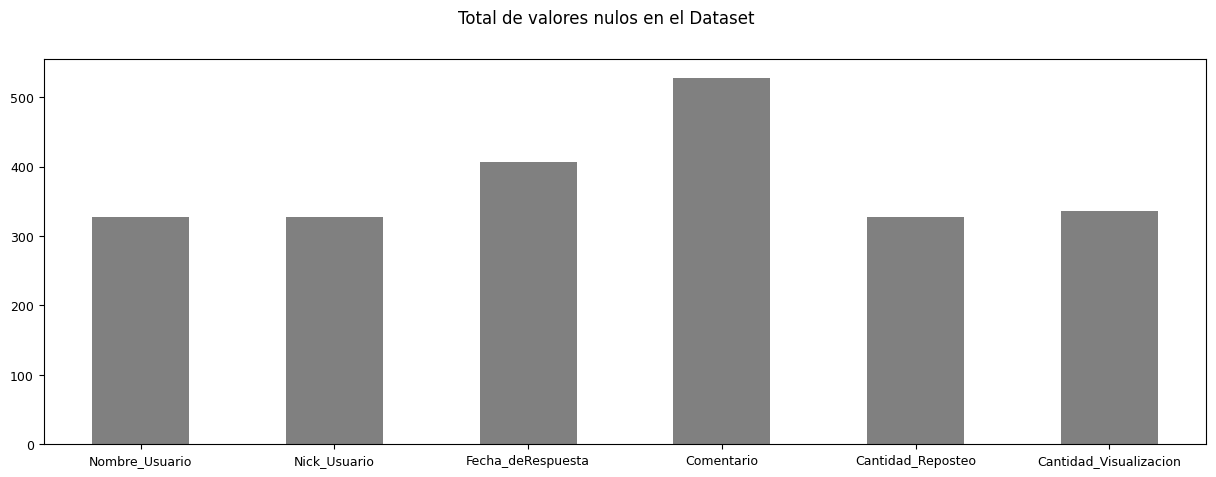

In [ ]:
plt.figure(figsize=(15,5))
tmp = Data_Eleccion.isnull().sum()
sns.barplot(y=tmp.values, x=tmp.index, color='grey', width=0.5)

plt.xticks(size=9)
plt.yticks(size=9)
plt.suptitle("Total de valores nulos en el Dataset")

---
**Eliminar valores nulos existentes de las columnas primordiales**

Nombre-Usuario, Nick-Usuario, Comentario

> Se eliminan las filas que tienen valores nulos en las columnas especificadas ("Nombre_Usuario", "Nick_Usuario", "Comentario"). El método dropna(subset=columnas_a_verificar, inplace=True) modifica el DataFrame Data_Eleccion directamente, eliminando las filas con valores nulos en las columnas especificadas.

In [ ]:
columnas_a_verificar = ["Nombre_Usuario", "Nick_Usuario", "Comentario"]
Data_Eleccion.dropna(subset=columnas_a_verificar, inplace=True)

---
**Graficar si siguen existiendo valores nulos existentes**

> Se crea un gráfico de barras para visualizar la cantidad de valores nulos en cada columna después de haber eliminado las filas con valores nulos en las columnas especificadas

Text(0.5, 0.98, 'Total de valores nulos en el Dataset')

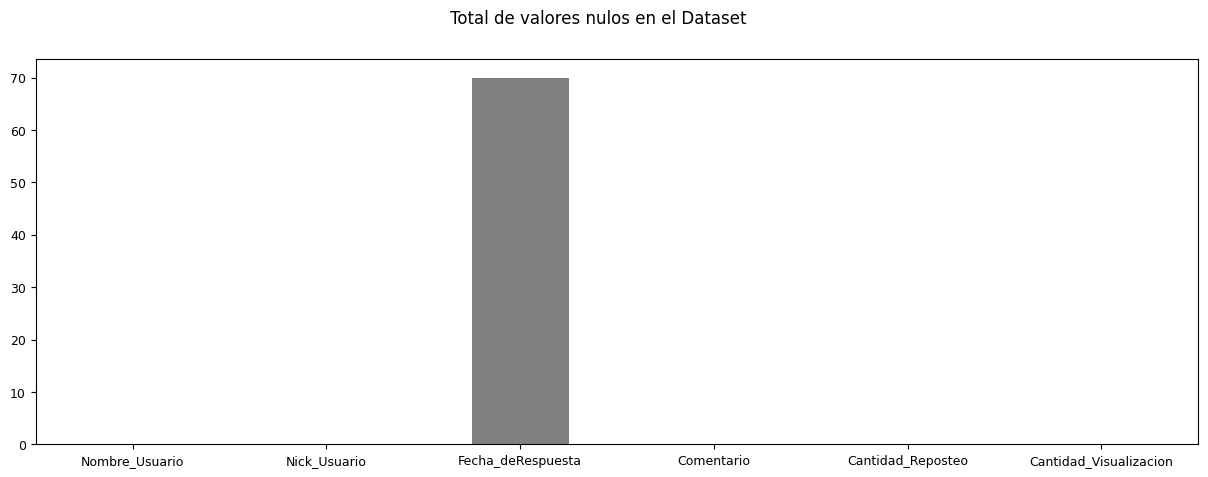

In [ ]:
plt.figure(figsize=(15,5))
tmp = Data_Eleccion.isnull().sum()
sns.barplot(y=tmp.values, x=tmp.index, color='grey', width=0.5)

plt.xticks(size=9)
plt.yticks(size=9)
plt.suptitle("Total de valores nulos en el Dataset")

## **3.3 VALORES DUPLICADOS**

---
**Verificar la cantidad de valores duplicados**

> Se imprime el número de valores duplicados en el DataFrame Data_Eleccion. Utiliza el método duplicated() para identificar duplicados y luego sum() para contar la cantidad total.

In [ ]:
print("Existen {0} valores duplicados".format(Data_Eleccion.duplicated().sum()))

Existen 1991 valores duplicados


> Se crea un gráfico de barras que muestra la cantidad de valores duplicados para cada usuario en la columna 'Nombre_Usuario' del DataFrame Data_Eleccion. Utiliza value_counts() para contar los duplicados por usuario y sns.barplot() para visualizarlos.

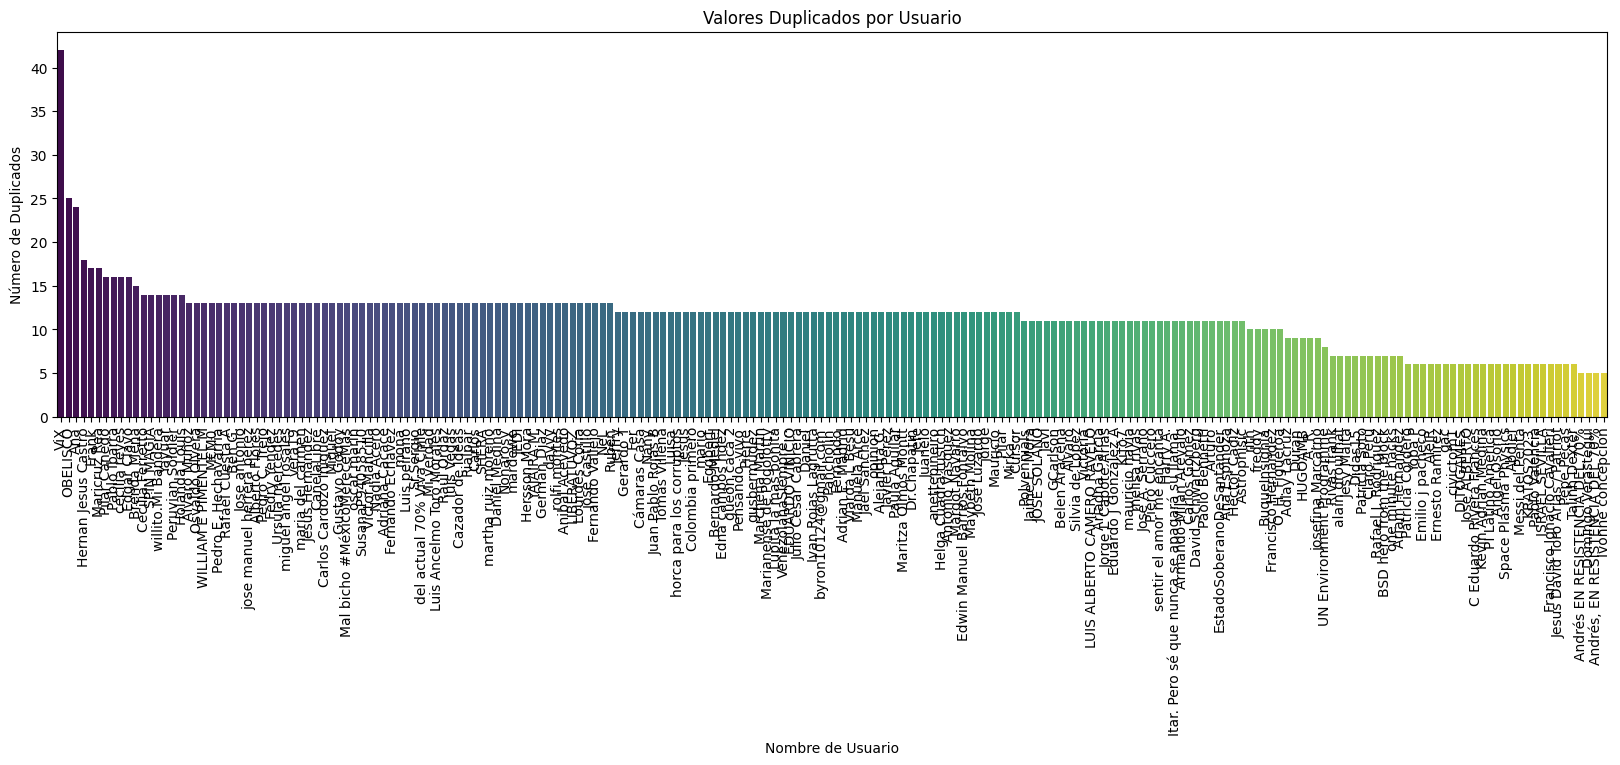

In [ ]:
duplicados_por_usuario = Data_Eleccion['Nombre_Usuario'].value_counts()
plt.figure(figsize=(20, 5))
sns.barplot(x=duplicados_por_usuario.index, y=duplicados_por_usuario.values, palette="viridis")
plt.xlabel('Nombre de Usuario')
plt.ylabel('Número de Duplicados')
plt.title('Valores Duplicados por Usuario')
plt.xticks(rotation=90)
plt.show()

---
**Eliminar valores duplicados por columnas**

Nombre-Usuario, Comentario

> Se elimina los duplicados en el DataFrame Data_Eleccion basándose en las columnas "Nombre_Usuario", "Nick_Usuario", y "Comentario".

In [ ]:
Data_Eleccion = Data_Eleccion.drop_duplicates(subset=["Nombre_Usuario","Nick_Usuario","Comentario"])

---
**Verificar nuevamente la cantidad de valores duplicados**

In [ ]:
print("Existen {0} valores duplicados".format(Data_Eleccion.duplicated().sum()))

Existen 0 valores duplicados


---
**Crear gráfico de barras**

> Se crea un gráfico de barras después de eliminar duplicados en el DataFrame Data_Eleccion.

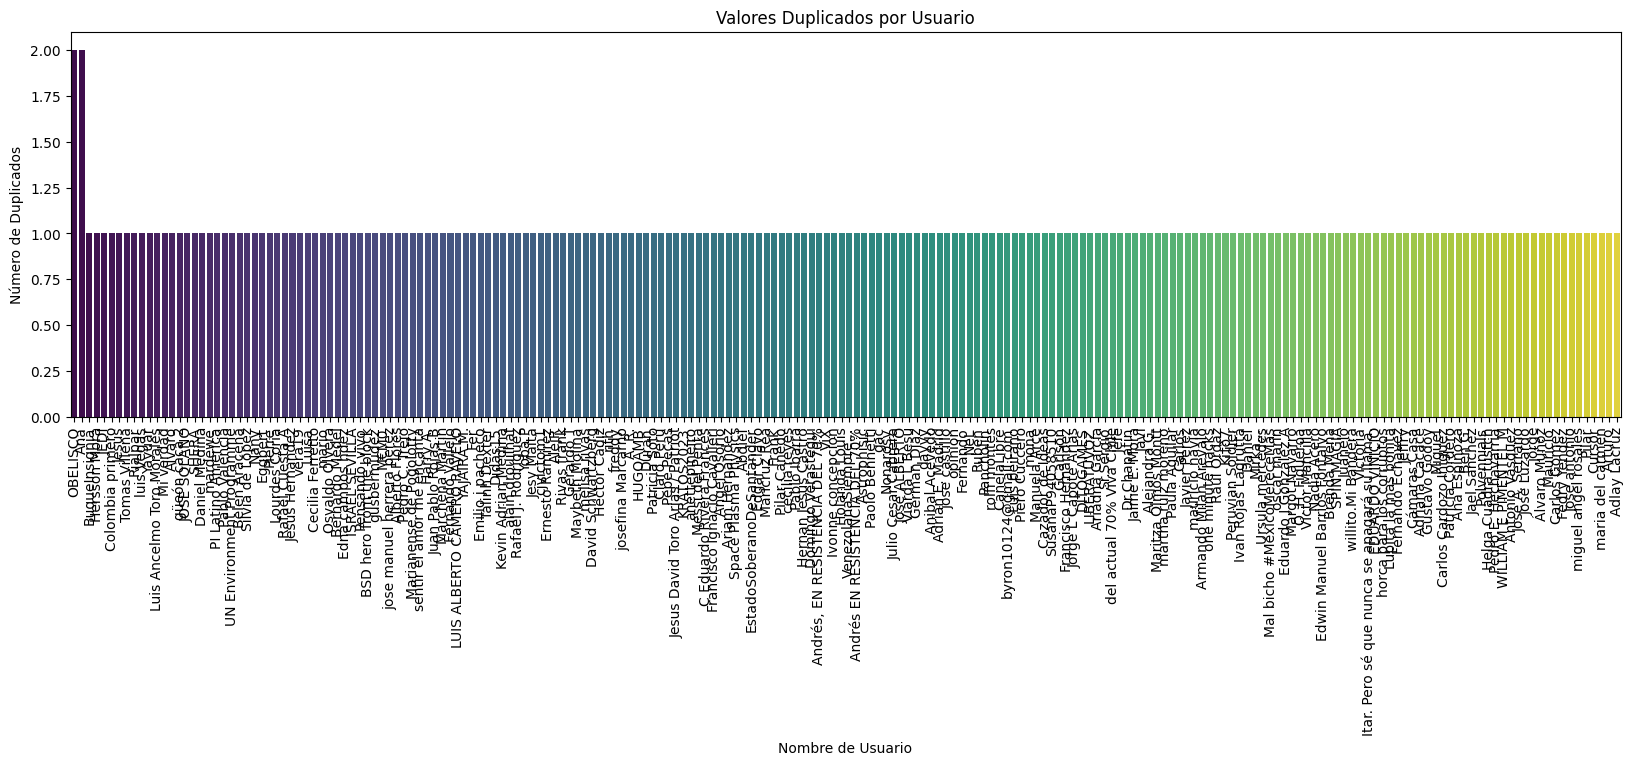

In [ ]:
duplicados_por_usuario = Data_Eleccion['Nombre_Usuario'].value_counts()
plt.figure(figsize=(20, 5))
sns.barplot(x=duplicados_por_usuario.index, y=duplicados_por_usuario.values, palette="viridis")
plt.xlabel('Nombre de Usuario')
plt.ylabel('Número de Duplicados')
plt.title('Valores Duplicados por Usuario')
plt.xticks(rotation=90)
plt.show()

---
**Verificar cantidad de usuarios que comentarón más de una vez para verificar comentarios de repetidos**

> Se calcula los conteos de valores únicos en la columna "Nombre_Usuario" y selecciona los usuarios que tienen al menos dos entradas duplicadas.

In [ ]:
conteos_usuario = Data_Eleccion['Nombre_Usuario'].value_counts()

usuarios_con_duplicados = conteos_usuario[conteos_usuario >= 2].index

usuarios_con_duplicados

Index(['OBELISCO', 'Ana'], dtype='object')

---
**Se puede verificar que los usuarios**

"@OBELISC63933786" = "Realizo 2 comentarios diferentes"

"@anaorellanag201", "@titinebleue" = "Tienen el mismo nombre de usuario, pero el nick de usuario es distinto"

In [ ]:
cantidad_usu = Data_Eleccion[Data_Eleccion['Nombre_Usuario'].isin(usuarios_con_duplicados)]

cantidad_usu

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
116,OBELISCO,@OBELISC63933786,10 oct.,La ONU fue creada por los 5 mayores violadores...,3.0,146
258,OBELISCO,@OBELISC63933786,10 oct.,la MAYOR FARSA JUDICIAL DE LA HISTORIA! Los de...,93.0,93
1039,Ana,@anaorellanag201,10 oct.,Bueno que se puede esperar de la ONU,1.0,10
1164,Ana,@titinebleue,12 oct.,Que asco,6.0,6


---
**Corregir el indice**

> Restablece el índice del DataFrame Data_Eleccion después de eliminar duplicados.

In [ ]:
Data_Eleccion = Data_Eleccion.reset_index(drop=True)

---
**Verificar el número de indice**

In [ ]:
Data_Eleccion

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
0,BuqueInsignia,@Erpintos,10 oct.,Habrá corrupción de por medio,43.0,43
1,Andrés EN RESISTENCIA DEL 70%,@AndresAH1984,10 oct.,La ONU solo protege a los DICTADORES y a los T...,3.0,1 mil
2,Francisco Hernández,@hernandezfranci,10 oct.,Esto tiene que ser un chiste de muy mal gusto....,1.0,628
3,Jorge L Capote Arias,@jorgitoplay1,10 oct.,"Y millones de exiliados, desterrados increíble...",15.0,1 mil
4,DITOGAMES,@DITOGAMESch,NaN,"If you own a mouse, you will never turn off yo...",102.0,72 mil
...,...,...,...,...,...,...
203,josefina Marcarno,@fnfiawu,10 oct.,Fin de mundo el demonio anda suelto,11.0,11
204,A. R.,@Anibaldarihe,10 oct.,Desde hace tiempo que la ONU no sirve más que ...,20.0,20
205,HUGOAMB,@HUGOMEJ91086095,10 oct.,"Es inverosímil, lo más absurdo que pueda haber...",16.0,16
206,Duran,@JoseAlf92651330,10 oct.,estamos a punto de irnos al carajo.... todo es...,16.0,16


## **3.4 RELLENAR VALORES NULOS EXISTENTES POR FILA-COLUMNA**

---
**Verificar valores nulos existentes por columnas**

> Se visualiza que en la Fecha-de-Respuesta existen 203 valores no nulos de 208 valores existentes. Por lo tanto, se entiende que existen 5 valores nulos en la columna Fecha-de-Respuesta

In [ ]:
Data_Eleccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre_Usuario          208 non-null    object 
 1   Nick_Usuario            208 non-null    object 
 2   Fecha_deRespuesta       203 non-null    object 
 3   Comentario              208 non-null    object 
 4   Cantidad_Reposteo       208 non-null    float64
 5   Cantidad_Visualizacion  208 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.9+ KB


> Se crea un nuevo DataFrame llamado fechas_vacias que contiene las filas de Data_Eleccion donde el valor en la columna 'Fecha_deRespuesta' es nulo (NaN).

In [ ]:
fechas_vacias = Data_Eleccion[Data_Eleccion['Fecha_deRespuesta'].isnull()]

fechas_vacias

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
4,DITOGAMES,@DITOGAMESch,NaN,"If you own a mouse, you will never turn off yo...",102.0,72 mil
21,one minute hacks,@oneminutehacks,NaN,El lado de Dubái del que no quieren que sepas....,3.0,175 mil
151,UN Environment Programme,@UNEP,NaN,"Living in Santiago's outskirts, Chile,",280.0,624 mil
179,ViX,@VIX,NaN,Bárbara de Regil y un gran elenco estelarizan ...,1.0,358 mil
183,Claro Perú,@ClaroPeru,NaN,¡Pide HOY tu plan,10.0,2 M


---
**Convertir las fechas de respuesta a Date para rellenar los valores nulos basandonos en el promedio total**

> Convierte la columna 'Fecha_deRespuesta' en Data_Eleccion a objetos de fecha utilizando la función pd.to_datetime. Luego, extrae solo la parte de la fecha y la asigna nuevamente a la columna 'Fecha_deRespuesta'. La parte '+ ' 2023'' agrega el año '2023' a las fechas. El parámetro errors='coerce' trata de manejar errores durante la conversión estableciendo los valores problemáticos como NaN.

In [ ]:
Data_Eleccion['Fecha_deRespuesta'] = pd.to_datetime(Data_Eleccion['Fecha_deRespuesta'] + ' 2023', format='%d %b. %Y', errors='coerce').dt.date

---
**Calcular el promedio (la fecha mas comun) de las fechas existentes en la columna "Fecha-de-Respuesta"**

> Se calcula la fecha más común en la columna 'Fecha_deRespuesta' de Data_Eleccion utilizando el método mode(). Si hay varias fechas con la misma frecuencia, se toma la primera con iloc[0].

In [ ]:
fecha_mas_comun = Data_Eleccion['Fecha_deRespuesta'].mode().iloc[0]

---
**Rellenar las fechas de respuesta vacías con el valor de fecha_mas_comun**

> Se rellena los valores nulos (NaN) en la columna 'Fecha_deRespuesta' de Data_Eleccion con la fecha más común calculada. El parámetro inplace=True realiza la modificación directamente en el DataFrame original.

In [ ]:
Data_Eleccion['Fecha_deRespuesta'].fillna(fecha_mas_comun, inplace=True)

---
**Verificar nuevamente si existen fechas vacias**

> Se vuelve a crear el DataFrame fechas_vacias, pero después de realizar el relleno de valores nulos en la columna 'Fecha_deRespuesta'. Debe estar vacío si el proceso de llenado fue exitoso.

In [ ]:
fechas_vacias = Data_Eleccion[Data_Eleccion['Fecha_deRespuesta'].isnull()]

fechas_vacias

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion


---
**Visualizar las fechas de respuesta rellenadas en los usuarios faltantes**

> Se crea un nuevo DataFrame llamado visualizar_Usuarios, que contiene las filas de Data_Eleccion donde el valor en la columna 'Nombre_Usuario' coincide con alguno de los tres nombres de usuario especificados ('DITOGAMES', 'one minute hacks', 'UN Environment Programme', 'ViX', 'Claro Perú'). Se utiliza el operador | para la condición OR.

In [ ]:
visualizar_Usuarios = Data_Eleccion[(Data_Eleccion['Nombre_Usuario'] == 'DITOGAMES') |
 (Data_Eleccion['Nombre_Usuario'] == 'one minute hacks') |
 (Data_Eleccion['Nombre_Usuario'] == 'UN Environment Programme') |
 (Data_Eleccion['Nombre_Usuario'] == 'ViX') |
 (Data_Eleccion['Nombre_Usuario'] == 'Claro Perú') ]

visualizar_Usuarios

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
4,DITOGAMES,@DITOGAMESch,2023-10-10,"If you own a mouse, you will never turn off yo...",102.0,72 mil
21,one minute hacks,@oneminutehacks,2023-10-10,El lado de Dubái del que no quieren que sepas....,3.0,175 mil
151,UN Environment Programme,@UNEP,2023-10-10,"Living in Santiago's outskirts, Chile,",280.0,624 mil
179,ViX,@VIX,2023-10-10,Bárbara de Regil y un gran elenco estelarizan ...,1.0,358 mil
183,Claro Perú,@ClaroPeru,2023-10-10,¡Pide HOY tu plan,10.0,2 M


## **3.5 CONVERSIÓN DE CANTIDAD - VISUALIZACIÓN n Mil a numeros enteros**

---
**Visualizar filas n Mil**

> Se convierte la columna 'Cantidad_Visualizacion' del DataFrame Data_Eleccion a tipo de dato string (str).

In [ ]:
Data_Eleccion['Cantidad_Visualizacion'] = Data_Eleccion['Cantidad_Visualizacion'].astype(str)

> Se crea un filtro llamado filtro_mil que identifica las filas en las que la columna 'Cantidad_Visualizacion' contiene la palabra 'mil' (sin importar mayúsculas o minúsculas). Luego, se crea un nuevo DataFrame llamado data_con_mil que contiene solo las filas que cumplen con este filtro.

In [ ]:
filtro_mil = Data_Eleccion['Cantidad_Visualizacion'].str.contains('mil', case=False)
data_con_mil = Data_Eleccion[filtro_mil]

data_con_mil

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
1,Andrés EN RESISTENCIA DEL 70%,@AndresAH1984,2023-10-10,La ONU solo protege a los DICTADORES y a los T...,3.0,1 mil
3,Jorge L Capote Arias,@jorgitoplay1,2023-10-10,"Y millones de exiliados, desterrados increíble...",15.0,1 mil
4,DITOGAMES,@DITOGAMESch,2023-10-10,"If you own a mouse, you will never turn off yo...",102.0,72 mil
9,Jefe,@jefedesarroIIo,2023-10-10,Urgente reevaluar criterios y compromisos con ...,1.0,1 mil
13,Javi,@JaviXCubaLibre,2023-10-10,Como es posible que un país que apoye el terro...,7.0,2 mil
21,one minute hacks,@oneminutehacks,2023-10-10,El lado de Dubái del que no quieren que sepas....,3.0,175 mil
151,UN Environment Programme,@UNEP,2023-10-10,"Living in Santiago's outskirts, Chile,",280.0,624 mil
177,Domingo Verastegui,@txomin4,2023-10-10,Esto es en sério? Aunque si lo es no me extrañ...,2.0,1 mil
178,"Andrés, EN RESISTENCIA DEL 70%",@AndresAH1984,2023-10-10,La ONU solo protege a los DICTADORES y a los T...,3.0,1 mil
179,ViX,@VIX,2023-10-10,Bárbara de Regil y un gran elenco estelarizan ...,1.0,358 mil


---
**Obtener el indice de cada "cantidad_visualización" para despues de la conversión de los valores se pueda verificar si los cambios fueron realizados**

In [ ]:
data_con_mil.index

Int64Index([1, 3, 4, 9, 13, 21, 151, 177, 178, 179], dtype='int64')

---
**Convertir los valores "n mil" en números enteros**

> Se define una función llamada convertir_a_entero que toma un texto como entrada y lo convierte a un entero. Si el texto contiene la expresión regular \d+\s*mil, se extrae el número antes de 'mil', se convierte a entero y se multiplica por 1000. En caso contrario, simplemente se convierte el texto a entero.

In [ ]:
def convertir_a_entero(texto):
    if pd.notna(texto):
        # Eliminar caracteres no numéricos y espacios
        texto_limpio = re.sub(r'[^\d]', '', texto)

        if re.search(r'\d+\s*mil', texto):
            numero = int(re.search(r'\d+', texto_limpio).group())
            return numero * 1000
        else:
            return int(texto_limpio)
    return texto

---
**Aplicar la función a la columna "Cantidad-Visualizacion"**

> Se aplica la función convertir_a_entero a cada elemento de la columna 'Cantidad_Visualizacion' del DataFrame Data_Eleccion. Esto se hace usando el método apply de pandas.

In [ ]:
Data_Eleccion['Cantidad_Visualizacion'] = Data_Eleccion['Cantidad_Visualizacion'].apply(convertir_a_entero)

---
**Verificar modificación en el Dataset**

> Selecciona filas específicas del DataFrame Data_Eleccion usando los índices proporcionados en la lista indices_deseados y crea un nuevo DataFrame llamado data_seleccionada que contiene solo esas filas.

In [ ]:
indices_deseados = [1, 3, 4, 9, 13, 21, 151, 177, 178, 179]
data_seleccionada = Data_Eleccion.loc[indices_deseados]
data_seleccionada

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
1,Andrés EN RESISTENCIA DEL 70%,@AndresAH1984,2023-10-10,La ONU solo protege a los DICTADORES y a los T...,3.0,1000
3,Jorge L Capote Arias,@jorgitoplay1,2023-10-10,"Y millones de exiliados, desterrados increíble...",15.0,1000
4,DITOGAMES,@DITOGAMESch,2023-10-10,"If you own a mouse, you will never turn off yo...",102.0,72000
9,Jefe,@jefedesarroIIo,2023-10-10,Urgente reevaluar criterios y compromisos con ...,1.0,1000
13,Javi,@JaviXCubaLibre,2023-10-10,Como es posible que un país que apoye el terro...,7.0,2000
21,one minute hacks,@oneminutehacks,2023-10-10,El lado de Dubái del que no quieren que sepas....,3.0,175000
151,UN Environment Programme,@UNEP,2023-10-10,"Living in Santiago's outskirts, Chile,",280.0,624000
177,Domingo Verastegui,@txomin4,2023-10-10,Esto es en sério? Aunque si lo es no me extrañ...,2.0,1000
178,"Andrés, EN RESISTENCIA DEL 70%",@AndresAH1984,2023-10-10,La ONU solo protege a los DICTADORES y a los T...,3.0,1000
179,ViX,@VIX,2023-10-10,Bárbara de Regil y un gran elenco estelarizan ...,1.0,358000


---
**Convertir columna "Cantidad-Reposteo" Dtype(float64) a Dtype(int64)**

> Convierte la columna 'Cantidad_Reposteo' del DataFrame Data_Eleccion a tipo de dato entero de 64 bits (int64).

In [ ]:
Data_Eleccion['Cantidad_Reposteo'] = Data_Eleccion['Cantidad_Reposteo'].astype('int64')

---
**Verificar información del Data_Eleccion**

In [ ]:
Data_Eleccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nombre_Usuario          208 non-null    object
 1   Nick_Usuario            208 non-null    object
 2   Fecha_deRespuesta       208 non-null    object
 3   Comentario              208 non-null    object
 4   Cantidad_Reposteo       208 non-null    int64 
 5   Cantidad_Visualizacion  208 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.9+ KB


# **4. TRANSFORMACIÓN DEL DATASET**

## **4.1 PREPROCESAMIENTO**









> El preprocesamiento es un conjunto de técnicas que se aplica sobre los datos con el objetivo de reducir el ruido del texto, reducir la dimensionalidad y mejorar la clasificación del modelo.



### **4.1.1 LIMPIEZA Y TOKENIZACION**

In [ ]:
Data_Eleccion

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Comentario,Cantidad_Reposteo,Cantidad_Visualizacion
0,BuqueInsignia,@Erpintos,2023-10-10,Habrá corrupción de por medio,43,43
1,Andrés EN RESISTENCIA DEL 70%,@AndresAH1984,2023-10-10,La ONU solo protege a los DICTADORES y a los T...,3,1000
2,Francisco Hernández,@hernandezfranci,2023-10-10,Esto tiene que ser un chiste de muy mal gusto....,1,628
3,Jorge L Capote Arias,@jorgitoplay1,2023-10-10,"Y millones de exiliados, desterrados increíble...",15,1000
4,DITOGAMES,@DITOGAMESch,2023-10-10,"If you own a mouse, you will never turn off yo...",102,72000
...,...,...,...,...,...,...
203,josefina Marcarno,@fnfiawu,2023-10-10,Fin de mundo el demonio anda suelto,11,11
204,A. R.,@Anibaldarihe,2023-10-10,Desde hace tiempo que la ONU no sirve más que ...,20,20
205,HUGOAMB,@HUGOMEJ91086095,2023-10-10,"Es inverosímil, lo más absurdo que pueda haber...",16,16
206,Duran,@JoseAlf92651330,2023-10-10,estamos a punto de irnos al carajo.... todo es...,16,16


---
**FUNCIÓN limpiar_tokenizar, dicha función limpia y tokeniza el texto en palabras individuales.**

**El orden en el que se va limpiando el texto no es arbitrario.**

**El listado de signos de puntuación se ha obtenido de: print(string.punctuation) y re.escape(string.punctuation)**

In [ ]:
def limpiar_tokenizar(texto):

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

---
**Se aplica la función de limpieza y tokenización a cada Data_Eleccion**

> Data_Eleccion['Comentario'].apply(lambda x: limpiar_tokenizar(x)): Aplica la función limpiar_tokenizar a cada elemento de la columna 'Comentario' en el DataFrame Data_Eleccion y crea una nueva columna llamada 'Comentario_tokenizado'.

> Data_Eleccion[['Comentario', 'Comentario_tokenizado']].head(): Muestra las primeras filas del DataFrame con las columnas 'Comentario' y 'Comentario_tokenizado' para visualizar el resultado del procesamiento.

In [ ]:
Data_Eleccion['Comentario_tokenizado'] = Data_Eleccion['Comentario'].apply(lambda x: limpiar_tokenizar(x))
Data_Eleccion[['Comentario', 'Comentario_tokenizado']].head()

,Comentario,Comentario_tokenizado
0,Habrá corrupción de por medio,"[habrá, corrupción, de, por, medio]"
1,La ONU solo protege a los DICTADORES y a los T...,"[la, onu, solo, protege, los, dictadores, los,..."
2,Esto tiene que ser un chiste de muy mal gusto....,"[esto, tiene, que, ser, un, chiste, de, muy, m..."
3,"Y millones de exiliados, desterrados increíble...","[millones, de, exiliados, desterrados, increíb..."
4,"If you own a mouse, you will never turn off yo...","[if, you, own, mouse, you, will, never, turn, ..."


## **4.2 ANALISIS EXPLORATORIO DE DATOS (EDA)**

#### **4.2.1 TIDY DATA**

> En el análisis de texto y procesamiento de lenguaje natural (NLP), uno de los pasos fundamentales es la tokenización. La tokenización implica dividir un texto en unidades más pequeñas, llamadas "tokens". Estos tokens suelen ser palabras individuales o partes significativas de palabras, como raíces (stemming) o lemas.

> Sin embargo, cuando realizamos la tokenización, los datos pueden perder su estructura ordenada y coherente, conocida como "tidy data". En lugar de tener una fila por documento original, cada token se convierte en una nueva fila. Esto puede resultar en una estructura de datos que no es fácil de analizar y visualizar.

> Para volver a una estructura de datos tidy, necesitamos realizar un proceso de expansión o "unnest". Esto implica duplicar el valor de las otras columnas tantas veces como sea necesario para que cada token tenga su propia fila. Aunque esto puede aumentar significativamente el número de filas en el conjunto de datos, tiene importantes beneficios.

> La expansión o unnest facilita diversas actividades de análisis de texto. Permite la agrupación, el contaje y la creación de gráficos de una manera más sencilla. Al tener una estructura tidy, podemos realizar análisis más efectivos y obtener una comprensión más profunda de los textos analizados.

---

> Se manipula Data_Eleccion que contiene comentarios tokenizados en la columna llamada 'Comentario_tokenizado'. Después de aplicar las operaciones, se explota esa columna para tener cada token en una fila separada, eliminado la columna llamada 'Comentario' y finalmente renombrado la columna resultante de 'Comentario_tokenizado' a 'token'.

In [ ]:
Data_tidy = Data_Eleccion.explode(column='Comentario_tokenizado')
Data_tidy = Data_tidy.drop(columns='Comentario')
Data_tidy = Data_tidy.rename(columns={'Comentario_tokenizado':'token'})

In [ ]:
Data_tidy

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Cantidad_Reposteo,Cantidad_Visualizacion,token
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,habrá
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,corrupción
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,de
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,por
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,medio
...,...,...,...,...,...,...
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,que
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,hay
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,es
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,terrorista


#### **4.2.2 FRECUENCIA DE PALABRAS**

**PALABRAS TOTALES POR Nick de Usuario**

----
***Agrupar los datos por 'Nick_Usuario' y contar los tokens***

>  Se utiliza el método groupby para agrupar los datos en el DataFrame Data_tidy por la columna 'Nick_Usuario'. Luego, se cuenta la cantidad de ocurrencias de cada 'token' dentro de cada grupo (usuario) mediante el método count(). Finalmente, se utiliza reset_index() para convertir los resultados en un nuevo DataFrame llamado token_conteo. Este nuevo DataFrame tendrá dos columnas: 'Nick_Usuario' y 'token', donde 'token' representa la cantidad de tokens por cada usuario.

In [ ]:
token_conteo = Data_tidy.groupby(by='Nick_Usuario')['token'].count().reset_index()

----
***Creación y visualización del gráfico de barras***


> Se utiliza la biblioteca Plotly Express (px) para crear un gráfico de barras (px.bar). Se utiliza el DataFrame token_conteo como fuente de datos. En el gráfico, el eje x representa los usuarios ('Nick_Usuario'), el eje y representa la cantidad de tokens ('token'), y el texto en cada barra muestra el recuento de tokens para ese usuario. Se realizan algunas actualizaciones en la apariencia del gráfico, como el título, etiquetas de ejes y la posición del texto en las barras, antes de mostrar el gráfico.

In [ ]:
fig = px.bar(token_conteo, x='Nick_Usuario', y='token', text='token',
             title='Palabras totales por usuario',
             labels={'token': 'Recuento de Tokens', 'Nick_Usuario': 'Usuario'})

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Tokens')

fig.show()

**PALABRAS DISTINTAS POR Nick de Usuario**

----
***Agrupar los datos por 'Nick_Usuario' y no unico los tokens***

> Se agrupa el DataFrame Data_tidy por 'Nick_Usuario', pero en lugar de contar la cantidad total de tokens, utiliza el método nunique() para contar la cantidad de tokens únicos por cada usuario. El resultado se almacena en un nuevo DataFrame llamado token_distinto, que tiene las columnas 'Nick_Usuario' y 'token'.

In [ ]:
token_distinto = Data_tidy.groupby(by='Nick_Usuario')['token'].nunique().reset_index()

----
***Creación y visualización del gráfico de barras***

> Se utiliza el DataFrame token_distinto para crear un gráfico de barras que muestra la cantidad de tokens distintos por usuario.

In [ ]:
fig = px.bar(token_distinto, x='Nick_Usuario', y='token', text='token',
             title='Palabras distintas por usuario',
             labels={'token': 'Recuento de Tokens', 'Nick_Usuario': 'Usuario'})

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Tokens')

fig.show()

#### **4.2.3 PALABRAS MAS UTILIZADAS POR Nick_Usuario**

---
**Recuento de palabras por usuario**

> Se utiliza la función groupby de Pandas para agrupar el DataFrame Data_tidy por las columnas 'Nick_Usuario' y 'token'. Luego, se cuenta el número de ocurrencias de 'token' en cada grupo utilizando count(). El resultado se almacena en un nuevo DataFrame llamado palabras_conteo con las columnas 'Nick_Usuario', 'token', y 'count' que representa el recuento de cada palabra por usuario.

In [ ]:
palabras_conteo = Data_tidy.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')

---
**Obtener las 5 primeras palabras utilizadas por usuario**

> Se utiliza nuevamente la función groupby para agrupar el DataFrame palabras_conteo por 'Nick_Usuario'. Luego, se aplica una función lambda usando apply para cada grupo, y se seleccionan las 5 filas con los valores más grandes en la columna 'count' usando nlargest(5, 'count'). El resultado es un DataFrame llamado top_palabras_por_usuario que contiene las 5 palabras más utilizadas por cada usuario.

In [ ]:
top_palabras_por_usuario = palabras_conteo.groupby('Nick_Usuario').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

In [ ]:
print(palabras_conteo)

     Nick_Usuario       token  count
0        @78Ernes          de      1
1        @78Ernes         onu      1
2        @78Ernes   organismo      1
3      @AJL196105       bueno      1
4      @AJL196105          en      1
...           ...         ...    ...
2156   @zayek3000  criminales      1
2157   @zayek3000    defiende      1
2158   @zayek3000          la      1
2159   @zayek3000         onu      1
2160   @zayek3000        solo      1

[2161 rows x 3 columns]


---
**Crear y visualizar el gráfico de barras**

> Se utiliza la biblioteca Plotly Express (px) para crear un gráfico de barras (bar chart). Se utiliza el DataFrame top_palabras_por_usuario como fuente de datos. Se especifican las columnas 'Nick_Usuario' en el eje x, 'count' en el eje y, y 'token' como etiquetas de texto en las barras.

In [ ]:
fig = px.bar(top_palabras_por_usuario, x='Nick_Usuario', y='count', text='token',
             title='Top 5 Palabras Más Utilizadas por Usuario',
             labels={'token': 'Palabra', 'count': 'Recuento'},
             color='token')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Palabras')
fig.update_layout(hovermode='x')

fig.show()

#### **4.2.4 STOP WORDS**

> Se denomina Stopwords a aquellas palabras que no nos aportan valor semántico, como por ejemplo las preposiciones, pero que sin embargo se repiten mucho, para reducir el número de palabras de un dataset estas palabras se eliminan de los textos.

---
**Obtener la lista de stopwords en español**

> Se importa las palabras de parada ("stopwords") en español utilizando la biblioteca NLTK (Natural Language Toolkit). Las palabras de parada son palabras comunes que a menudo se filtran en el procesamiento de lenguaje natural. Luego, imprime las primeras 10 palabras de la lista de palabras de parada en español.

In [ ]:
stop_words_spanish = stopwords.words('spanish')
# VISUALIZACIÓN DE LOS 10 PRIMEROS STOPWORDS
print(stop_words_spanish[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


---
**Obtener la lista de stopwords en ingles**

> Se importa las palabras de parada ("stopwords") en inglés utilizando la biblioteca NLTK (Natural Language Toolkit). Las palabras de parada son palabras comunes que a menudo se filtran en el procesamiento de lenguaje natural. Luego, imprime las primeras 10 palabras de la lista de palabras de parada en inglés.

In [ ]:
stop_words_english = stopwords.words('english')
# VISUALIZACIÓN DE LOS 10 PRIMEROS STOPWORDS
print(stop_words_english[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


**Filtro para excluir Stopwords en español**

> Filtra las filas del DataFrame Data_tidy donde la columna "token" contiene palabras que están en la lista de palabras de parada en español. El operador ~ significa "no", por lo que estamos seleccionando las filas donde los tokens no están en la lista de palabras de parada en español.

In [ ]:
Data_tidy = Data_tidy[~(Data_tidy["token"].isin(stop_words_spanish))]

**Filtro para excluir Stopwords en inglés**

> Filtra las filas del DataFrame Data_tidy donde la columna "token" contiene palabras que están en la lista de palabras de parada en inglés. El operador ~ significa "no", por lo que estamos seleccionando las filas donde los tokens no están en la lista de palabras de parada en inglés.

In [ ]:
Data_tidy = Data_tidy[~(Data_tidy["token"].isin(stop_words_english))]

---
**Recuento de palabras por usuario**

> Se agrupa los datos en el DataFrame Data_tidy por el nombre de usuario (Nick_Usuario) y por token, cuenta la frecuencia de cada token y crea un nuevo DataFrame llamado palabras_conteo con las columnas 'Nick_Usuario', 'token' y 'count'.

In [ ]:
palabras_conteo = Data_tidy.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')

---
**Obtener las 5 primeras palabras utilizadas por usuario**

> Se selecciona las 5 palabras más utilizadas por usuario en base al recuento ('count') y crea un nuevo DataFrame llamado top_palabras_por_usuario.

In [ ]:
top_palabras_por_usuario = palabras_conteo.groupby('Nick_Usuario').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

---
**Crear y visualizar el gráfico de barras**

> Se utiliza la biblioteca Plotly Express para crear un gráfico de barras. Muestra las cinco palabras más utilizadas por usuario, donde el *eje x* representa el nombre de usuario, el *eje y* representa el recuento de palabras, y el color de las barras representa las palabras específicas.

In [ ]:
fig = px.bar(top_palabras_por_usuario, x='Nick_Usuario', y='count', text='token',
             title='Top 5 Palabras Más Utilizadas por Usuario',
             labels={'token': 'Palabra', 'count': 'Recuento'},
             color='token')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Palabras')
fig.update_layout(hovermode='x')

fig.show()

---
**Excluir palabras innecesarias y filtrar**

> Se amplía la lista de palabras de parada en español con algunas palabras adicionales y luego filtra nuevamente las filas en Data_tidy donde los tokens están en la lista actualizada de palabras de parada en español.

In [ ]:
stop_words_spanish = list(stopwords.words('spanish'))
stop_words_spanish.extend(("chaaaaaaaaaa","af","da","ddhh","quééé","huviando","chupe","huevo","mierda","epa","cabrones","wos",
                           "si","mmn","bueee","trumppp","estai","así","ah","dan","ghandi","hussein","hayque","che","carajo","bueee","boba","¿como","cagada"))

Data_tidy = Data_tidy[~(Data_tidy["token"].isin(stop_words_spanish))]

---
**Recuento de palabras por usuario para obtener las 5 primeras palabras utilizadas por usuarios. Crear y visualizar el gráfico de barras**

> Se utiliza la lista de palabras de parada en español actualizada. Crea un gráfico de barras que muestra las cinco palabras más utilizadas por usuario después de aplicar la filtración con la nueva lista de palabras de parada en español.

In [ ]:
palabras_conteo = Data_tidy.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')
top_palabras_por_usuario = palabras_conteo.groupby('Nick_Usuario').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
fig = px.bar(top_palabras_por_usuario, x='Nick_Usuario', y='count', text='token',
             title='Top 5 Palabras Más Utilizadas por Usuario',
             labels={'token': 'Palabra', 'count': 'Recuento'},
             color='token')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Palabras')
fig.update_layout(hovermode='x')

fig.show()

#### **4.2.5 CORRELACION ENTRE Nick_Usuario**

---
**Pivotar Datos**

> **groupby(["Nick_Usuario","token"])["token"].agg(["count"]):** Agrupa los datos en base a las columnas "Nick_Usuario" y "token" y cuenta la ocurrencia de cada combinación.

> **reset_index():** Reinicia el índice del DataFrame para convertir los resultados del groupby en columnas.

> **.pivot(index="token", columns="Nick_Usuario", values="count"):** Transforma los datos para tener "token" como índice, "Nick_Usuario" como columnas y "count" como valores. Esencialmente, está creando una tabla pivote.

In [ ]:
Data_pivot = Data_tidy.groupby(["Nick_Usuario","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="Nick_Usuario", values= "count")
Data_pivot.columns.name = None

---
**Test de correlación (coseno) por el uso y frecuencia de palabras**

> Se define una función llamada similitud_coseno que toma dos vectores (a y b) y calcula la similitud del coseno entre ellos. Utiliza la función cosine para calcular la distancia del coseno y luego resta ese valor de 1 para obtener la similitud del coseno.

In [ ]:
def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

---
**Calcula la matriz de correlación**

> Se calcula la matriz de correlación entre los usuarios utilizando la función corr del DataFrame Data_pivot. La similitud del coseno se utiliza como el método de correlación.

In [ ]:
correlation_matrix = Data_pivot.corr(method=similitud_coseno)

---
**Convertir Data_pivot.columns en una lista**

> Se crea una lista de las columnas (nombres de usuario) en la matriz de datos pivotada.

In [ ]:
usuario_columnas = Data_pivot.columns.tolist()

---
**Seleccionar la muestra aleatoria, crear la matriz de correlación solo para la muestra y visualizar en el mapa de calor**

> Selecciona aleatoriamente 10 usuarios de la lista de usuarios, crea una submatriz de la matriz de correlación solo para esos usuarios, rellena los valores NaN con ceros y luego visualiza esta submatriz como un mapa de calor utilizando la biblioteca Seaborn (sns) y Matplotlib (plt).

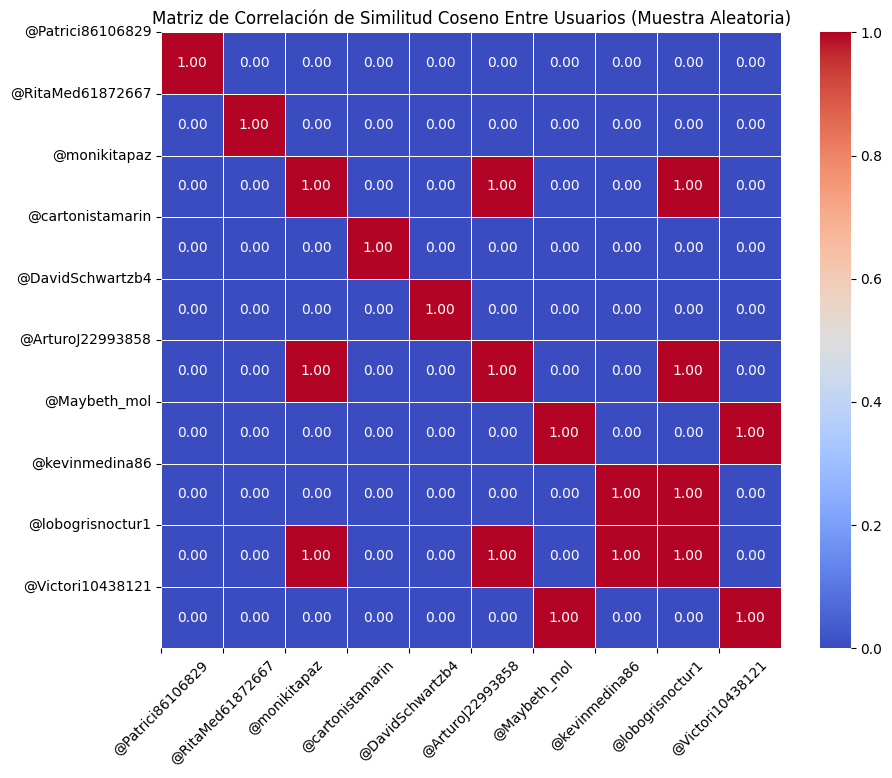

In [ ]:
muestra_usuarios = random.sample(usuario_columnas, k=10)

muestra_correlation_matrix = correlation_matrix.loc[muestra_usuarios, muestra_usuarios]

muestra_correlation_matrix = muestra_correlation_matrix.fillna(0)


plt.figure(figsize=(10, 8))

sns.heatmap(muestra_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.xticks(range(len(muestra_usuarios)), muestra_usuarios, rotation=45)
plt.yticks(range(len(muestra_usuarios)), muestra_usuarios)

plt.title("Matriz de Correlación de Similitud Coseno Entre Usuarios (Muestra Aleatoria)")

plt.show()

> **1 indica una similitud perfecta entre los usuarios.** Dos usuarios con una similitud coseno de 1 son idénticos en términos de sus interacciones con los tokens. Esto significa que tienen los mismos patrones de comportamiento en el conjunto de datos.


> **0 indica que no hay similitud entre los usuarios.** Dos usuarios con una similitud coseno de 0 no tienen ningún patrón de comportamiento en común en el conjunto de datos. No hay correlación entre sus interacciones.


> **-1 indica una similitud perfecta pero en sentido opuesto.** Dos usuarios con una similitud coseno de -1 son opuestos en términos de sus interacciones con los tokens. Tienen patrones de comportamiento completamente opuestos en el conjunto de datos.


Los valores entre 1 y 0 indican diferentes grados de similitud, donde valores más cercanos a 1 indican una mayor similitud y valores más cercanos a 0 indican una menor similitud.

## **4.3 EXTRACCIÓN DE CARACTERÍSTICAS**


> Los *features* (o características), se define como **"una representación numérica de los datos en bruto"**, es decir, son las estructuras en las que podemos representar nuestros datos para entrenar nuestros modelos. Según el problema que nos planteemos resolver, tendremos que utilizar la *features* que mejor se adapte tanto al problema como al modelo que vayamos a utilizar. Elegir la *features* que mejor se adapte a nuestro datos, modelo y problema, es lo que se conoce como Feature engineering.

> Los métodos de extracción de características tienen como objetivo reducir el número de palabras del dataset, quedándonos solo con las más representativas para, en este caso, determinar si un texto es positivo o negativo. La elección de unas buenas features hace que los siguientes pasos sean más fáciles, de lo contrario estaremos desarrollando un modelo más complejo.

Los métodos de extracción de features más comunes son los siguientes:

> Bag of Words (BoW): Representa el número de veces que veces aparece una  palabra en un texto, aquí una característica es una palabra y el vector contiene  el número de veces que se repite esa palabra en un texto determinado.

> Bag of n-Grams: Consiste en agrupar las palabras en conjuntos de palabras  según el orden en que aparecen, de esta manera nos pueden aportar más  información. Los grupos de dos palabras denominan bigramas, los de tres; trigramas y así sucesivamente.

> Tf-ldf (Term frequency-inverse document frequency): Aquí se intenta dar  más peso a las palabras menos frecuentes, porque estas pueden aportarnos  más información acerca del significado de un texto.

### **4.3.1 TERM FREQUENCY E INVERSE DOCUMENT FREQUENCY**

> Se intenta dar más peso a las palabras menos frecuentes, porque estas pueden aportarnos más información acerca del significado de un texto. Si una palabra aparece en muchos textos de nuestro dataset, con esta feature, su valor tenderá al mínimo (1). La fórmula con la que se calcula es la siguiente:


> tf - idf = (count(palabras,texto)*NúmeroTotalTextos) / (count(NúmeroTextos,palabra))

> El objetivo es reducir el número de features a las más representativas, consiste en filtrar basándose en la frecuencia de las palabras. También se puede aplicar esta técnia con una fórmula con logaritmos. El objetivo es quitarnos las palabras que aparecen mucho en un texto, pero poco en los demás ya que son las que más nos pueden ayudar a descifrar el significado de un texto, es filtrar basándose en la frecuencia de las palabras.

> El número de palabras (o n-gramas) únicas que obtengamos será el número de características de nuestro dataset. (Alarcón, 2022, pp.17-18)

**TF (Term Frequency):**

> El TF mide cuántas veces aparece un término específico en un documento o texto.


**IDF (Inverse Document Frequency):**

> IDF es una medida de cuán rara o común es un término en un conjunto de documentos.

> Un valor de IDF alto indica que el término es poco común en todos los documentos.

> Un valor de IDF bajo indica que el término es común en muchos documentos.

> Una fórmula común para calcular IDF es: IDF = log(total_documentos / (n_documentos + 1)), donde "total_documentos" es el número total de documentos en el conjunto y "n_documentos" es el número de documentos que contienen el término.

>  Una IDF alta indica que el término es distintivo y puede tener un mayor impacto en el cálculo del TF-IDF.



**TF-IDF (Term Frequency-Inverse Document Frequency):**

>  TF-IDF combina la frecuencia de término (TF) en un documento con el valor IDF para ese término en todos los documentos.

>  TF mide cuán a menudo aparece un término en un documento específico.

>  IDF mide cuán raro o común es ese término en el conjunto de documentos.

>  El valor de TF-IDF indica la importancia relativa del término en ese documento en comparación con su importancia en todos los documentos.

>  n valor de TF-IDF alto indica que el término es importante en ese documento en particular.

**Cálculo term-frecuency (tf)**

> Se crea una copia del DataFrame Data_tidy y asignándolo a la variable tf.

In [ ]:
tf = Data_tidy.copy()

> Se realiza operaciones de procesamiento de datos para calcular la frecuencia de términos (tf) en cada tweet. Se agrupan los datos por "Nick_Usuario" y "token", se cuenta la frecuencia de cada término, se agrega una columna con el total de términos por tweet, se calcula la frecuencia relativa (tf), y finalmente, se muestran las tres filas con los valores de tf más bajos.

In [ ]:
# Número de veces que aparece cada término en cada tweet
tf = tf.groupby(["Nick_Usuario", "token"])["token"].agg(["count"]).reset_index()
# Se añade una columna con el total de términos por tweet
tf['total_count'] = tf.groupby('Nick_Usuario')['count'].transform(sum)
# Se calcula el tf
tf['tf'] = tf["count"] / tf["total_count"]
tf.sort_values(by = "tf").head(3)

,Nick_Usuario,token,count,total_count,tf
476,@OBELISC63933786,existen,1,37,0.027027
488,@OBELISC63933786,mayores,1,37,0.027027
489,@OBELISC63933786,meses,1,37,0.027027


**Inverse document frequency (idf)**

> Se crea copia del DataFrame Data_tidy y asignándolo a la variable idf.

In [ ]:
idf = Data_tidy.copy()

> Se calcula el Inverse Document Frequency (IDF). Se cuentan los documentos (tweets) en los que aparece cada término, se calcula el IDF y se muestran las tres filas con los valores de IDF más bajos.

In [ ]:
total_documents = idf["Nick_Usuario"].drop_duplicates().count()
# Número de documentos (tweets) en los que aparece cada término
idf = idf.groupby(["token", "Nick_Usuario"])["token"].agg(["count"]).reset_index()
idf['n_documentos'] = idf.groupby('token')['count'].transform(sum)
# Cálculo del idf
idf['idf'] = np.log(total_documents / idf['n_documentos'])
idf = idf[["token","n_documentos", "idf"]].drop_duplicates()
idf.sort_values(by="idf").head(3)

,token,n_documentos,idf
680,onu,84,0.852387
606,mundo,19,2.338765
274,derechos,18,2.392832


**Term Frequency - Inverse Document Frequency**

> Se realiza la multiplicación de los valores de tf y idf para obtener el TF-IDF. Se fusionan los DataFrames tf e idf utilizando la columna "token", se calcula el TF-IDF multiplicando las columnas correspondientes, y se muestran las primeras filas del resultado, ordenadas por "Nick_Usuario".

In [ ]:
tf_idf = pd.merge(left=tf, right=idf, on="token")
tf_idf["tf_idf"] = tf_idf["tf"] * tf_idf["idf"]
tf_idf.sort_values(by="Nick_Usuario").head()

,Nick_Usuario,token,count,total_count,tf,n_documentos,idf,tf_idf
0,@78Ernes,onu,1,2,0.5,84,0.852387,0.426193
81,@78Ernes,organismo,1,2,0.5,6,3.491444,1.745722
87,@AJL196105,bueno,1,5,0.2,9,3.085979,0.617196
95,@AJL196105,organización,1,5,0.2,5,3.673766,0.734753
99,@AJL196105,socialistas,1,5,0.2,2,4.590057,0.918011


**Para el usuario "@78Ernes" y el token "onu":**

> **"count" es 1**, lo que significa que el token "onu" aparece una vez en el documento de "@78Ernes".

> **"total_count" es 2**, lo que indica que el token "onu" aparece un total de 2 veces en todos los documentos.

> **"tf" es 0.5000**, lo que significa que el token "onu" representa el 50% del contenido en el documento de "@78Ernes".

> **"n_documentos" es 84**, lo que indica que el token "onu" aparece en 84 documentos en total.

> **"idf" es 0.852387**, lo que significa que el token "onu" no es muy común en comparación con otros tokens.

> **"tf_idf" es 0.426193**, lo que indica que el token "onu" tiene una ponderación TF-IDF baja en el documento de "@78Ernes".

**Para el usuario "@AJL196105" y el token "socialistas":**

> **"count" es 1**, lo que significa que el token "socialistas" aparece una vez en el documento de "@AJL196105".

> **"total_count" es 5**, lo que indica que el token "socialistas" aparece un total de 5 veces en todos los documentos.

> **"tf" es 0.2**, lo que significa que el token "socialistas" representa el 20% del contenido en el documento de "@AJL196105".

> **"n_documentos" es 2**, lo que indica que el token "socialistas" solo aparece en 2 documentos en total.

> **"idf" es 4.590057**, lo que significa que el token "socialistas" es bastante poco común en todos los documentos.

> **"tf_idf" es 0.918011**, lo que indica que el token "socialistas" tiene una ponderación TF-IDF baja en el documento de "@AJL196105".

# **5. ANALISIS DE SENTIMIENTO**

## **5.1 DESCARGAR LEXICON "latin1"**

> **url:** Almacena la URL de un archivo CSV que contiene un léxico de palabras con sus respectivos valores de sentimiento.

> **requests.get(url):** Utiliza la librería requests para hacer una solicitud GET a la URL y obtener la respuesta.

> **with open("lexico_afinn.en.es.csv", "wb") as file:** Abre un archivo llamado "lexico_afinn.en.es.csv" en modo binario de escritura ("wb").

> **file.write(response.content):** Escribe el contenido de la respuesta (el contenido del archivo CSV descargado) en el archivo localmente.

In [ ]:
url = "https://raw.githubusercontent.com/jboscomendoza/rpubs/master/sentimientos_afinn/lexico_afinn.en.es.csv"
response = requests.get(url)
with open("lexico_afinn.en.es.csv", "wb") as file:
    file.write(response.content)

## **5.2 LEER EL ARCHIVO CSV EN UN DATAFRAME**

> Esta porción utiliza la librería pandas (pd) para leer el archivo CSV descargado y cargarlo en un DataFrame de pandas llamado sentimientos. La función pd.read_csv lee el archivo CSV y el argumento encoding="latin1" se utiliza para manejar el tipo de codificación del archivo.

In [ ]:
sentimientos = pd.read_csv("lexico_afinn.en.es.csv", encoding="latin1")

> Se imprime las primeras 3 filas del DataFrame sentimientos usando el método head(3). Esto proporciona una vista rápida de las primeras filas del DataFrame para verificar que los datos se han cargado correctamente.

In [ ]:
sentimientos.head(3)

,Palabra,Puntuacion,Word
0,a bordo,1,aboard
1,abandona,-2,abandons
2,abandonado,-2,abandoned


## **5.3 EJECUCIÓN DE SENTIMIENTO**

### **5.3.1 ASIGNAR TWEETS POSITIVOS, NEGATIVOS Y NEUTROS**

---
**Realizar el inner join**

> Se realiza una fusión (merge) entre dos DataFrames, Data_tidy y sentimientos. La fusión se realiza utilizando la columna "token" del DataFrame Data_tidy y la columna "Palabra" del DataFrame sentimientos. La fusión es interna (how="inner"), lo que significa que solo se incluirán las filas que tengan coincidencias en ambas columnas.

In [ ]:
tweets_sent = pd.merge(Data_tidy, sentimientos, left_on="token", right_on="Palabra", how="inner")

---
**Calcular el sentimiento promedio de cada tweet**

> Se agrupa el DataFrame resultante de la fusión (tweets_sent) por las columnas 'Nombre_Usuario', 'Nick_Usuario', 'token', y 'Word'. Luego, se suma la columna 'Puntuacion' para cada grupo. El resultado se almacena en un nuevo DataFrame llamado sentimiento_promedio, y se reinician los índices con reset_index().

In [ ]:
sentimiento_promedio = tweets_sent.groupby(['Nombre_Usuario', 'Nick_Usuario','token','Word'])['Puntuacion'].sum().reset_index()

---
**Visualizar de las 3 últimas filas del sentimiento promedio**

> Se imprime las últimas 3 filas del DataFrame sentimiento_promedio, lo que proporciona una vista previa de los datos resultantes.

In [ ]:
sentimiento_promedio.tail(3)

,Nombre_Usuario,Nick_Usuario,token,Word,Puntuacion
177,oscar marin,@cartonistamarin,broma,joke,2
178,rolfi montes,@rojoeterno58,avanzado,advanced,1
179,Álvaro Muñoz,@AlvaroMunoz,cuestionable,questionable,-2


---
**Calcular el porcentaje de tweets positivos, negativos y neutros por autor**

> Se agrupa el DataFrame sentimiento_promedio por la columna 'Nick_Usuario'. Luego, se utiliza el método agg() para aplicar funciones de agregación a la columna 'Puntuacion'. Se calcula el porcentaje de valores positivos, neutros y negativos para cada grupo utilizando funciones lambda. El resultado se almacena en un nuevo DataFrame llamado resumen_por_autor, y se reinician los índices con reset_index().

In [ ]:
resumen_por_autor = sentimiento_promedio.groupby('Nick_Usuario').agg(
    positivos=('Puntuacion', lambda x: 100 * (x > 0).sum() / len(x)),
    neutros=('Puntuacion', lambda x: 100 * (x == 0).sum() / len(x)),
    negativos=('Puntuacion', lambda x: 100 * (x < 0).sum() / len(x))
).reset_index()

---
**Visualizar las 3 últimas filas del resumen por autor (usuario)**

> Se imprime las últimas 3 filas del DataFrame resumen_por_autor, mostrando un resumen del análisis de sentimientos por autor.

In [ ]:
resumen_por_autor.tail(3)

,Nick_Usuario,positivos,neutros,negativos
92,@titinebleue,0.0,0.0,100.0
93,@ulitamer,100.0,0.0,0.0
94,@zayek3000,0.0,0.0,100.0


### **5.3.2 ASIGNAR TWEETS DE LA COLUMNA 'PUNTUACION**

---
**Crear una copia del DataFrame tweets_sent a tweets_sent_2 para asignar "Positiva", "Negativa" o "Neutra" a la columna Puntuacion**

> Se crea una copia del DataFrame tweets_sent llamada tweets_sent_2. Luego, agrega una nueva columna llamada 'Puntuacion' basada en los valores de la columna existente 'Puntuacion'. Si el valor es mayor que 0, se etiqueta como 'Positiva'; si es menor que 0, se etiqueta como 'Negativa'; de lo contrario, se etiqueta como 'Neutra'.

In [ ]:
tweets_sent_2 = tweets_sent.copy()

tweets_sent_2['Puntuacion'] = ['Positiva' if p > 0 else 'Negativa' if p < 0 else 'Neutra' for p in tweets_sent_2['Puntuacion']]

### **5.3.3 PALABRAS POSITIVAS MÁS USADAS POR USUARIOS**

---
**Eliminar las filas con token (palabra) igual a 'no'**

> Se filtra las filas en el DataFrame tweets_sent_2 donde el valor en la columna 'token' no es igual a "no".

In [ ]:
tweets_sent_2 = tweets_sent_2[tweets_sent_2['token'] != "no"]

---
**Filtrar las palabras positivas**

> Se crea un nuevo DataFrame llamado palabras_positivas que contiene solo las filas donde la columna 'Puntuacion' tiene el valor "Positiva".

In [ ]:
palabras_positivas = tweets_sent_2[tweets_sent_2['Puntuacion'] == "Positiva"]

---
**Contar las palabras más usadas por Nick_Usuario**

> Se agrupan las filas en el DataFrame palabras_positivas por las columnas 'Nick_Usuario' y 'token', y se cuenta el número de ocurrencias de 'token' en cada grupo. El resultado se almacena en un nuevo DataFrame llamado top_palabras_positivas.

In [ ]:
top_palabras_positivas = palabras_positivas.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')

---
**Encontrar las palabras más usadas**

> Se selecciona las 10 palabras con mayor frecuencia ('count') para cada 'Nick_Usuario' en el DataFrame top_palabras_positivas. Se utiliza la función nlargest para realizar esta operación.

In [ ]:
top_palabras_positivas = top_palabras_positivas.groupby('Nick_Usuario').apply(lambda x: x.nlargest(10, columns='count')).reset_index(drop=True)

---
**Crear gráfico interactivo con Plotly**

> Se utiliza la biblioteca Plotly Express para crear un gráfico de barras horizontales. El gráfico muestra las palabras positivas más utilizadas por los usuarios. Cada barra representa una palabra, su longitud indica la frecuencia, y el color representa el usuario.

In [ ]:
fig = px.bar(top_palabras_positivas, x='count', y='token', color='Nick_Usuario', orientation='h')
fig.update_layout(
    barmode='stack',
    height=700,
    width=800,
    title='Palabras Positivas Más Usadas por Usuarios'
)
fig.show()

---
**Crear nube de palabras con WordCloud**

> Se crea un diccionario de frecuencias (word_frequency) a partir de las filas del DataFrame top_palabras_positivas, y luego utiliza la biblioteca WordCloud para generar y mostrar una nube de palabras basada en esas frecuencias. La nube de palabras visualiza las palabras positivas más frecuentes, donde el tamaño de la palabra representa su frecuencia.

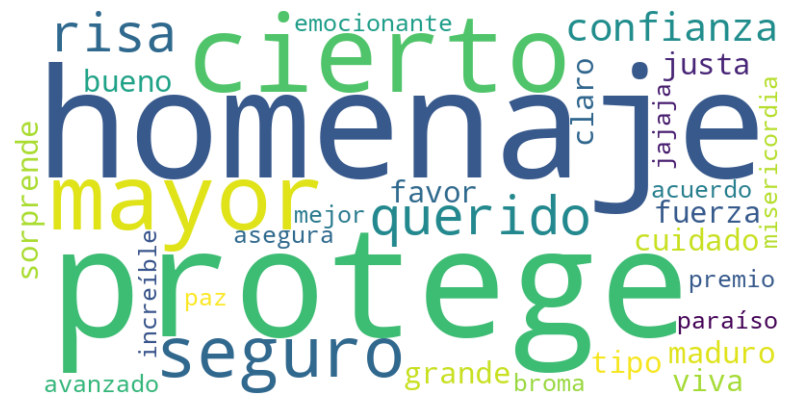

In [ ]:
word_frequency = {row['token']: row['count'] for _, row in top_palabras_positivas.iterrows()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **5.3.4 PALABRAS NEGATIVAS MÁS USADAS POR USUARIOS**

---
**Eliminar las filas con token (palabra) igual a 'no'**

> Se elimina todas las filas donde el valor en la columna 'token' sea igual a "no".

In [ ]:
tweets_sent_2 = tweets_sent_2[tweets_sent_2['token'] != "no"]

---
**Filtrar las palabras negativas**

> Se crea un nuevo DataFrame llamado palabras_negativas que contiene solo las filas de tweets_sent_2 donde el valor en la columna 'Puntuacion' es igual a "Negativa".

In [ ]:
palabras_negativas = tweets_sent_2[tweets_sent_2['Puntuacion'] == "Negativa"]

---
**Contar las palabras más usadas por Nick_Usuario**

> Se agrupan los datos en palabras_negativas por 'Nick_Usuario' y 'token'. Luego se cuenta la frecuencia de cada token para cada usuario y se crea un nuevo DataFrame llamado top_palabras_negativas con las columnas 'Nick_Usuario', 'token' y 'count', donde 'count' representa la frecuencia de cada palabra.

In [ ]:
top_palabras_negativas = palabras_negativas.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')

---
**Encontrar las palabras más usadas**

> Para cada usuario, selecciona las 50 palabras con las frecuencias más altas. Esto se hace utilizando el método nlargest en cada grupo de usuario. El resultado se almacena nuevamente en top_palabras_negativas.

In [ ]:
top_palabras_negativas = top_palabras_negativas.groupby('Nick_Usuario').apply(lambda x: x.nlargest(50, columns='count')).reset_index(drop=True)

---
**Crear un gráfico interactivo con Plotly**

> Se utiliza la biblioteca Plotly Express (px) para crear un gráfico de barras horizontal. Cada barra representa la frecuencia de una palabra negativa, y las barras están coloreadas según el usuario. La visualización final se muestra con fig.show().

In [ ]:
fig = px.bar(top_palabras_negativas, x='count', y='token', color='Nick_Usuario', orientation='h')

fig.update_layout(
    barmode='stack',
    height=900,
    width=900,
    title='Palabras Negativas Más Usadas por Usuarios'
)

fig.show()

---
**Crear nube de palabras con Wordcloud**

> Se crea un diccionario (word_frequency) a partir de las columnas 'token' y 'count' de top_palabras_negativas. Luego, se utiliza este diccionario para generar una nube de palabras (wordcloud) con la biblioteca WordCloud. Finalmente, se muestra la nube de palabras utilizando Matplotlib.

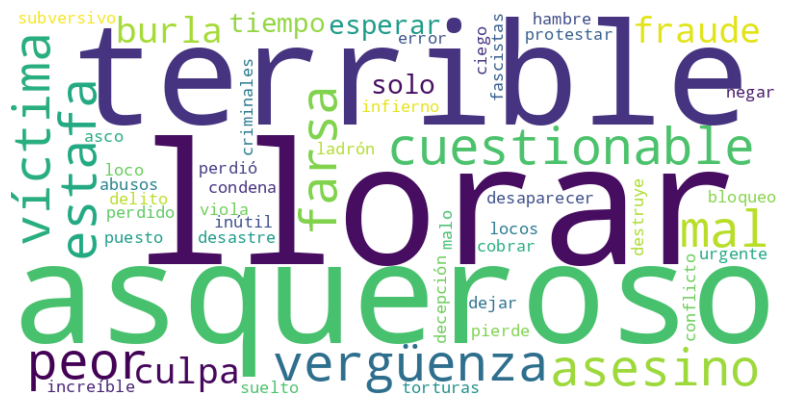

In [ ]:
word_frequency = {row['token']: row['count'] for _, row in top_palabras_negativas.iterrows()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **6. MODELADO**

## **6.1 APLICAR LA PUNTUACION EN 0 (NEGATIVO) Y 1 (POSITIVO)**

---
**Definir una función para la transformación**

> Se define una función llamada binario_score que toma un argumento score. La función realiza la siguiente lógica:

> Si el valor de score es menor que 0, la función devuelve 0.

> Si el valor de score es mayor que 1, la función devuelve 1.

> En cualquier otro caso, la función devuelve el propio valor de score.

In [ ]:
def binario_score(score):
    if score < 0:
        return 0
    elif score > 1:
        return 1
    else:
        return score

---
**Aplicar la función a la columna "Puntuacion"**

In [ ]:
sentimiento_promedio["Puntuacion"] = sentimiento_promedio["Puntuacion"].apply(binario_score)

> Se aplica la función binario_score a la columna "Puntuacion" de un DataFrame llamado sentimiento_promedio. En otras palabras, convierte las puntuaciones en el rango (0, 1) y ajusta cualquier valor fuera de ese rango a 0 o 1.

---
**Graficar la puntuación de los datos en 0 y 1 para verificar si los cambios fueron realizados**

> Se utiliza la biblioteca Matplotlib para crear un gráfico de barras que muestra la distribución de las puntuaciones después de la transformación. Muestra la cantidad de comentarios para cada puntuación (0 o 1).

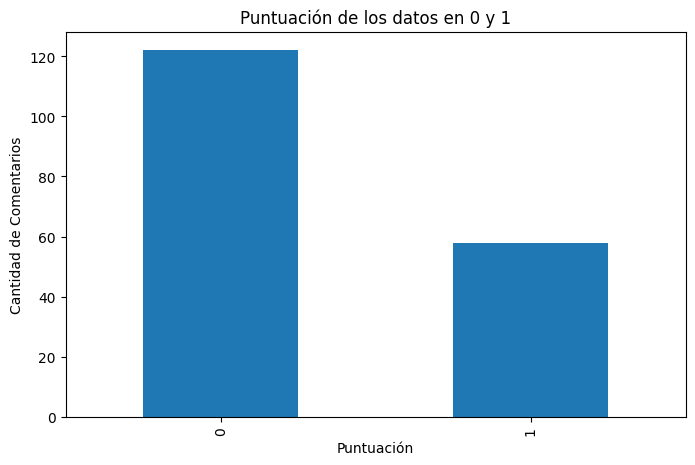

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Puntuación de los datos en 0 y 1")
sentimiento_promedio["Puntuacion"].value_counts().plot(kind='bar')
plt.xlabel("Puntuación")
plt.ylabel("Cantidad de Comentarios")
plt.show()

## **6.2 DIVISION DE DATOS DE ENTRENAMIENTO Y TEST**

> La división de datos de entrenamiento y prueba es una práctica común en el aprendizaje automático (machine learning) para evaluar el rendimiento de un modelo

---
**Definir las características (X) y la variable objetivo (y)**

> Se definen dos variables, **X** e **y**, que se utilizarán para entrenar un modelo más adelante. **X** representa la columna "token" (presumiblemente las características del modelo), y **y** representa la columna "Puntuacion" (las etiquetas que queremos predecir).

In [ ]:
X = sentimiento_promedio["token"]
y = sentimiento_promedio["Puntuacion"]

---
**Se dividen los datos en un 80% para entrenamiento y un 20% para prueba**

> Se divide los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. El 20% de los datos se utilizarán como conjunto de prueba, y se establece una semilla aleatoria (random_state) para asegurar la reproducibilidad.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
**Visualización de la distribución de puntuaciones en datos de entrenamiento**

> Se crea un gráfico de barras que muestra la distribución de las puntuaciones en el conjunto de entrenamiento.

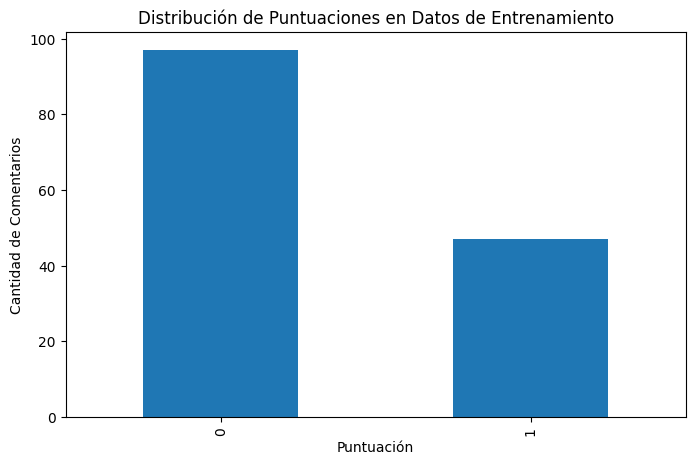

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Distribución de Puntuaciones en Datos de Entrenamiento")
y_train.value_counts().plot(kind='bar')
plt.xlabel("Puntuación")
plt.ylabel("Cantidad de Comentarios")
plt.show()

---
**Visualización de la distribución de puntuaciones en datos de prueba**

> Se crea un gráfico de barras que muestra la distribución de las puntuaciones en el conjunto de prueba.

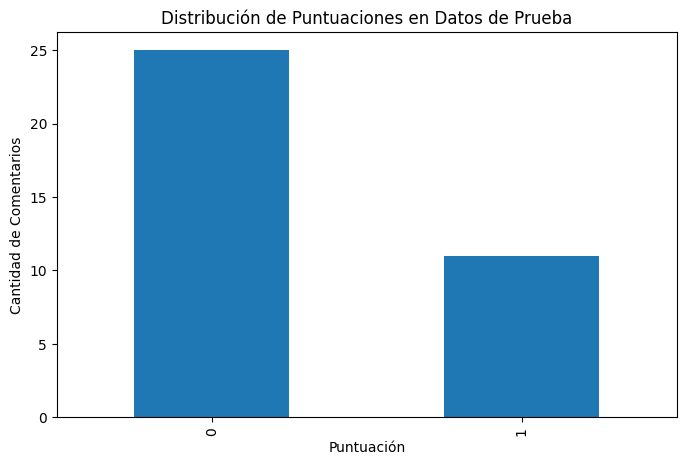

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Distribución de Puntuaciones en Datos de Prueba")
y_test.value_counts().plot(kind='bar')
plt.xlabel("Puntuación")
plt.ylabel("Cantidad de Comentarios")
plt.show()

## **6.3 SUBMUESTREO (UNDERSAMPLING)**

> El submuestreo, o undersampling en inglés, es una técnica utilizada en el campo del aprendizaje automático para abordar problemas de desequilibrio de clases en conjuntos de datos. Cuando se trabaja con conjuntos de datos en los que una clase está representada de manera significativamente menor que otra, puede haber dificultades para que el modelo aprenda patrones de la clase minoritaria. El submuestreo aborda esto reduciendo el tamaño de la clase mayoritaria para equilibrar proporcionalmente ambas clases.

### **6.3.1 APLICAR SUBMUESTREO**

---
**Combinar las características 'X_train' y las etiquetas 'y_train'**

> Se utiliza la función concat de la biblioteca pandas para concatenar (unir) dos conjuntos de datos a lo largo de un eje específico. X_train y y_train son dos conjuntos de datos, y axis=1 indica que la concatenación se realizará a lo largo de las columnas. Esto asume que X_train y y_train tienen el mismo índice para poder unirse correctamente.

In [ ]:
training_data = pd.concat([X_train, y_train], axis=1)

---
**Separar el conjunto de entrenamiento en positivos y negativos**

> Se crean dos conjuntos de datos separados, train_positives y train_negatives, filtrando las filas de training_data donde la columna 'Puntuacion' es igual a 1 o 0, para dividir los datos en dos conjuntos basados en su puntuación.

In [ ]:
train_positives = training_data[training_data['Puntuacion'] == 1]
train_negatives = training_data[training_data['Puntuacion'] == 0]

---
**Realizar el submuestreo de los negativos para igualar el número de ejemplos de ambas clases**

> Se utiliza la función resample de la biblioteca sklearn.utils para realizar un muestreo aleatorio (downsampling en este caso) de los datos negativos para igualar la cantidad de muestras positivas. replace=False indica que no se permiten repeticiones en el muestreo, y n_samples=len(train_positives) establece el número de muestras en el conjunto negativo muestreado para que sea igual al número de muestras positivas. El random_state=42 es una semilla para garantizar reproducibilidad.

In [ ]:
train_negatives_downsampled = resample(train_negatives, replace=False, n_samples=len(train_positives), random_state=42)

---
**Combinar los datos submuestreados con los positivos**

> Se concatena los conjuntos de datos positivos y negativos muestreados (downsampled) para crear un conjunto de datos de entrenamiento balanceado. Esto se hace para abordar problemas de desequilibrio de clases en los que una clase (en este caso, la puntuación 0) tiene muchas más muestras que la otra. La concatenación asegura que tengamos igual cantidad de muestras de ambas clases para el entrenamiento del modelo.

In [ ]:
balanced_training_data = pd.concat([train_positives, train_negatives_downsampled])

### **6.3.2 VISUALIZAR SUBMUESTREO**

---
**Calcular la distribución de clases antes del submuestreo**

> Se utiliza la función value_counts de pandas para contar el número de ocurrencias de cada valor único en la columna 'Puntuacion' del conjunto de datos original (training_data). El resultado es una serie que muestra la distribución de clases antes de realizar el submuestreo.

In [ ]:
class_distribution_before = training_data['Puntuacion'].value_counts()

---
**Calcular la distribución de clases después del submuestreo**

> Se utiliza value_counts, pero ahora en el conjunto de datos balanceado (balanced_training_data). Proporciona la distribución de clases después de realizar el submuestreo.

In [ ]:
class_distribution_after = balanced_training_data['Puntuacion'].value_counts()

---
**Visualizar submuestreo antes y después**

> Se utiliza la biblioteca matplotlib para crear un gráfico de barras que compara la distribución de clases antes y después del submuestreo. El gráfico tiene dos subgráficos (uno para antes y otro para después), cada uno mostrando la cantidad de ejemplos para cada clase. plt.subplot(1, 2, 1) y plt.subplot(1, 2, 2) se utilizan para crear dos subgráficos en una fila y dos columnas. plt.tight_layout() garantiza que los gráficos no se superpongan y plt.show() muestra el gráfico final.

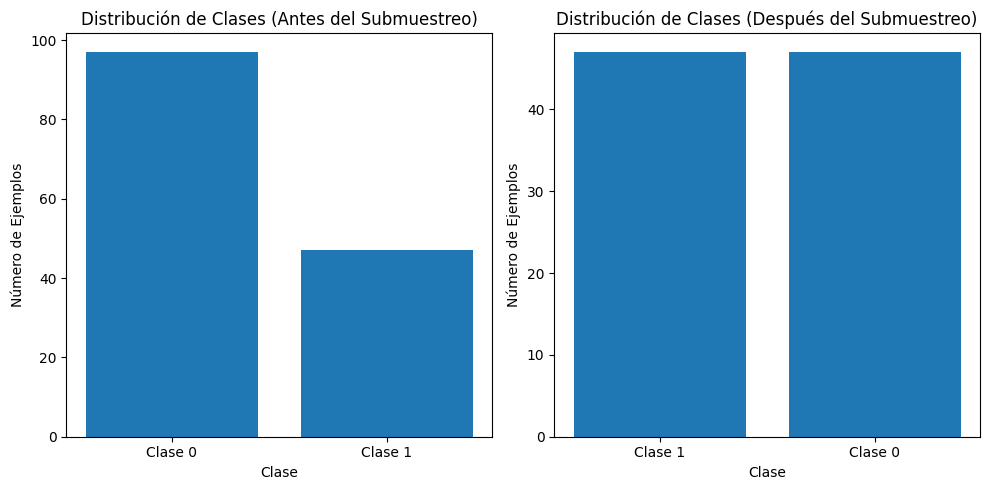

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.index, class_distribution_before.values)
plt.title('Distribución de Clases (Antes del Submuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.xticks(class_distribution_before.index, ['Clase 0', 'Clase 1'])

plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.index, class_distribution_after.values)
plt.title('Distribución de Clases (Después del Submuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.xticks(class_distribution_after.index, ['Clase 0', 'Clase 1'])

plt.tight_layout()
plt.show()

## **6.4 MODELOS**

> 1. **Linear SVM (Support Vector Machine)**:
   - El SVM lineal es un algoritmo de clasificación que busca encontrar el hiperplano que mejor separa dos clases en un espacio multidimensional. El objetivo es maximizar la distancia entre el hiperplano y los puntos más cercanos de ambas clases. En el caso de problemas de clasificación lineal, el SVM es muy efectivo y se utiliza para separar datos en dos clases.

> 2. **Random Forest**:
   - Random Forest es un algoritmo de conjunto que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento. Cada árbol se entrena en un subconjunto aleatorio de datos y utiliza una selección aleatoria de características. Luego, para predecir una etiqueta, los árboles votan y la etiqueta con más votos se elige como la predicción final. Random Forest es conocido por su capacidad para manejar datos ruidosos y trabajar bien en una variedad de problemas de clasificación y regresión.



### **6.4.1 MODELOS AJUSTE 1**

#### **6.4.1.1 LINEAR SVM - AJUSTE 1**

---
**Definir el modelo**

**CountVectorizer:** Es la primera etapa del modelo ('vectorizer').

Convierte una colección de documentos de texto en una matriz de recuento de tokens. Es decir, transforma el texto en vectores de frecuencia de palabras.

**TfidfTransformer:** Es la segunda etapa ('tfidf').

Calcula la ponderación TF-IDF (Term Frequency-Inverse Document Frequency) de los términos en la matriz de recuento generada por CountVectorizer. Esto ayuda a dar más peso a las palabras que son más informativas para la clasificación.

**SVC:** Es la tercera etapa ('clf' para clasificador).

Es la implementación de scikit-learn de un clasificador de máquinas de soporte vectorial. En este caso, se utiliza para realizar la clasificación.

In [ ]:
svm_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC())
])

---
**Definir los hiperparámetros a ajustar**

> Se define un diccionario svm_params que contiene los hiperparámetros que se utilizarán en la búsqueda de cuadrícula (Grid Search) para encontrar la mejor combinación de parámetros del modelo, probando diferentes valores de C (parámetro de penalización), kernel (tipo de kernel) y class_weight (pesos de clase)

**clf__C: [0.1, 1, 10]:**

> Un valor más bajo (como 0.1) implica una regularización más fuerte, mientras que un valor más alto (como 10) indica una regularización más débil.

**clf__kernel: ['linear', 'poly', 'rbf']:**

> 'linear' es una transformación lineal, 'poly' es un kernel polinómico y 'rbf' es un kernel de función de base radial.

**clf__class_weight: ['balanced', None]:**

> 'balanced' ajusta automáticamente los pesos de las clases en función de sus frecuencias en los datos, mientras que None significa que no se aplica ponderación de clases.

In [ ]:
svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'poly', 'rbf'],
    'clf__class_weight': ['balanced', None]
}

---
**Configurar GridSearchCV**

> Se crea un objeto GridSearchCV (svm_grid) que realiza una búsqueda exhaustiva sobre una cuadrícula de valores de parámetros. Los parámetros son especificados por param_grid (en este caso, los definidos en svm_params). scoring especifica las métricas de evaluación que se utilizarán para evaluar el rendimiento del modelo (en este caso, precisión, F1 y recall). refit indica que se seleccionará el modelo con la mejor precisión para ajustar el estimador final, n_jobs = -1 para que se ejecute en paralelo utilizando todos los procesadores disponibles. cv especifica la estrategia de validación cruzada (en este caso, 5-fold cross-validation).

In [ ]:
svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_params, scoring=['accuracy', 'f1', 'recall'], refit='accuracy', n_jobs=-1, cv=5)

---
**Entrenar el modelo con los datos equilibrados**

> Ajusta el modelo de SVM utilizando la búsqueda de cuadrícula y los datos proporcionados (balanced_training_data). El ajuste implica probar todas las combinaciones posibles de parámetros y seleccionar la mejor según las métricas definidas.

In [ ]:
svm_grid.fit(balanced_training_data["token"], balanced_training_data["Puntuacion"])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__class_weight': ['balanced', None],
                         'clf__kernel': ['linear', 'poly', 'rbf']},
             refit='accuracy', scoring=['accuracy', 'f1', 'recall'])

---
**Obtener los mejores hiperparámetros y modelo**

> Se extraen los mejores parámetros encontrados (best_svm_params) y el mejor modelo (best_svm_model) encontrado durante la búsqueda para luego ser utilizados para hacer predicciones en nuevos datos.

In [ ]:
best_svm_params = svm_grid.best_params_
best_svm_model = svm_grid.best_estimator_

#### **6.4.1.2 RANDOM FOREST - AJUSTE 1**

---
**Definir el modelo**

> **CountVectorizer():** Convierte una colección de documentos de texto en una matriz de recuentos de términos.

> **TfidfTransformer():** Transforma una matriz de recuentos de términos en una representación TF-IDF (Term Frequency-Inverse Document Frequency).

> **RandomForestClassifier(n_estimators=100):** Un clasificador de bosque aleatorio con 100 estimadores (árboles de decisión).

In [ ]:
rf_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100))
])

---
**Entrena el modelo con los datos de entrenamiento balanceados**

> Se entrena el modelo utilizando el método fit con los datos de entrenamiento. balanced_training_data["token"] contiene las características (tokens) y balanced_training_data["Puntuacion"] contiene las puntuaciones asociadas

In [ ]:
rf_model.fit(balanced_training_data["token"], balanced_training_data["Puntuacion"])

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

---
**Realiza predicciones sobre los datos de prueba**

> Se realiza las predicciones en un conjunto de datos de prueba (X_test) utilizando el modelo entrenado.

In [ ]:
rf_predictions = rf_model.predict(X_test)

---
**Calcula la precisión del modelo**

> Se calcula la precisión del modelo comparando las predicciones (rf_predictions) con las etiquetas reales del conjunto de prueba (y_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)

---
**Imprime un informe detallado del rendimiento del modelo**

In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.52      1.00      0.69        11

    accuracy                           0.72        36
   macro avg       0.76      0.80      0.72        36
weighted avg       0.85      0.72      0.73        36



#### **6.4.1.3 TABLA DE RESULTADOS DE AMBOS MODELOS**

---
**Calcular la precisión del modelo Random Forest**

> Con el modelo de Random Forest (rf_model) se realiza las predicciones (rf_predictions) sobre el conjunto de datos de prueba (X_test). Luego, se calcula la precisión (rf_accuracy) comparando las predicciones con las etiquetas reales del conjunto de prueba (y_test) utilizando la función accuracy_score.

In [ ]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

---
**Calcular el recall score, F1 score y precision score de los modelos Linear SVM y Random Forest**

> Se calcula varias métricas de rendimiento para los modelos Linear SVM y Random Forest. Las métricas incluyen el recuerdo (recall), la puntuación F1 (f1_score), y la precisión (precision_score). Estas métricas se calculan comparando las predicciones de los modelos con las etiquetas reales del conjunto de prueba.

In [ ]:
linear_svm_recall = recall_score(y_test, best_svm_model.predict(X_test))
random_forest_recall = recall_score(y_test, rf_predictions)
linear_svm_f1_score = f1_score(y_test, best_svm_model.predict(X_test))
random_forest_f1_score = f1_score(y_test, rf_predictions)
linear_svm_precision_score = precision_score(y_test, best_svm_model.predict(X_test))
random_forest_precision_score = precision_score(y_test, rf_predictions)

---
**Crear la tabla de resultados**

> Se crea un DataFrame de Pandas (results) que almacena las métricas de rendimiento de los dos modelos. Se incluyen las métricas de precisión tanto para el conjunto de entrenamiento como para el conjunto de prueba.

In [ ]:
results = pd.DataFrame({
    "Modelo": ["Linear SVM", "Random Forest"],
    "Accuracy_train": [best_svm_model.score(balanced_training_data["token"], balanced_training_data["Puntuacion"]), rf_accuracy],
    "Accuracy_test": [best_svm_model.score(X_test, y_test), rf_accuracy],
    "Recall": [linear_svm_recall, random_forest_recall],
    "F1-score": [linear_svm_f1_score, random_forest_f1_score],
    "Precisión": [linear_svm_precision_score, random_forest_precision_score]
})

---
**Imprimir la tabla**

In [ ]:
print(results)

          Modelo  Accuracy_train  Accuracy_test  Recall  F1-score  Precisión
0     Linear SVM        0.968085       0.722222     1.0    0.6875    0.52381
1  Random Forest        0.722222       0.722222     1.0    0.6875    0.52381


#### **6.4.1.4 MATRIZ DE CONFUSION**

---
**Obtener las predicciones de los modelos**

> Se utiliza los dos modelos para hacer predicciones en el conjunto de datos de prueba (X_test).

In [ ]:
svm_predictions = best_svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

---
**Generar las matrices de confusión**

> Se utiliza la función confusion_matrix para calcular las matrices de confusión de las predicciones hechas por los modelos.

In [ ]:
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

---
**Generar las gráficas de las matrices de confusión**

> Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un algoritmo de clasificación. Contiene información sobre los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

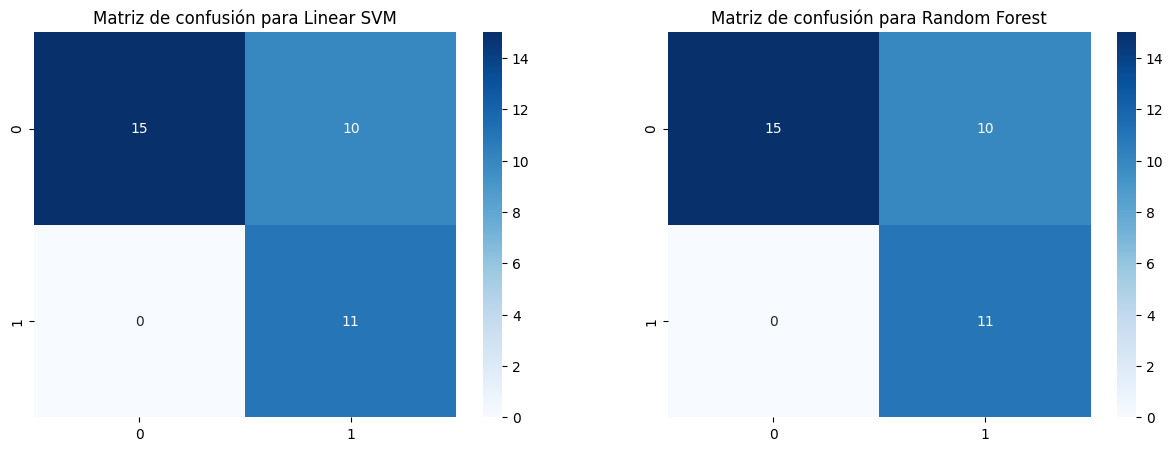

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de confusión para Linear SVM')

sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de confusión para Random Forest')

plt.show()

### **6.4.2 MODELOS AJUSTE 2**

#### **6.4.2.1 LINEAR SVM - AJUSTE 2**

---
**Definir el modelo**

> **'vectorizer':** Esta etapa utiliza TfidfVectorizer para convertir el texto en una representación numérica mediante la técnica TF-IDF.

> **'clf':** Esta etapa utiliza SVC para implementar un clasificador de máquinas de soporte vectorial.

In [ ]:
svm_model2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', SVC())
])

---
**Definir los hiperparámetros**

> Se definen los parámetros que se utilizarán en la búsqueda de cuadrícula (GridSearchCV).

**clf__C:**

> Este parámetro controla el término de regularización en el SVM. Valores más pequeños especifican una regularización más fuerte.

> Los valores proporcionados en la lista [0.001, 0.01, 0.1, 1, 10, 100] son diferentes valores de regularización que se probarán durante la búsqueda de cuadrícula. La búsqueda de cuadrícula intentará determinar cuál es el valor óptimo para este parámetro.

**clf__kernel:**

> Este parámetro especifica el tipo de kernel a utilizar en el SVM.

> Los valores proporcionados en la lista ['linear', 'poly', 'rbf', 'sigmoid'] indican los diferentes tipos de kernel que se probarán durante la búsqueda de cuadrícula. El objetivo es determinar cuál es el kernel más apropiado para el conjunto de datos.

**clf__class_weight:**

> Este parámetro controla el peso asignado a las clases en el SVM. Puede ser 'balanced', lo que significa que las clases se ponderan inversamente proporcionalmente a sus frecuencias, o None, lo que significa que todas las clases tienen el mismo peso.

> Los valores proporcionados en la lista ['balanced', None] indican las opciones que se probarán durante la búsqueda de cuadrícula para determinar cuál es la mejor configuración para el peso de clase.

In [ ]:
svm_params2 = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__class_weight': ['balanced', None]
}

---
**Configurar GridSearchCV**

> Se crea un objeto GridSearchCV que realiza una búsqueda exhaustiva sobre una cuadrícula de parámetros para un estimador. Los argumentos importantes son:

**estimator:** El modelo que se utilizará.

**param_grid:** La cuadrícula de parámetros que se probarán.

**scoring:** La métrica utilizada para evaluar la calidad de los modelos. En este caso, se utiliza 'accuracy', 'f1', 'recall'.

**refit:** Se especifica 'accuracy' para que el modelo se ajuste a los mejores parámetros encontrados en la cuadrícula utilizando la métrica de precisión.

**n_jobs:** Número de trabajadores para paralelizar el ajuste del modelo. Con -1, se utiliza el número de núcleos disponibles.

**cv:** Número de divisiones en la validación cruzada. En este caso, se utiliza k-fold cross-validation con k=5.

In [ ]:
svm_grid2 = GridSearchCV(estimator=svm_model2, param_grid=svm_params2, scoring=['accuracy', 'f1', 'recall'], refit='accuracy', n_jobs=-1, cv=5)

---
**Entrenar el modelo con los datos equilibrados**

> Se ajusta el modelo SVM a los datos de entrenamiento. balanced_training_data["token"] es la entrada (datos de características) y balanced_training_data["Puntuacion"] es la salida (clases).

In [ ]:
svm_grid2.fit(balanced_training_data["token"], balanced_training_data["Puntuacion"])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__class_weight': ['balanced', None],
                         'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='accuracy', scoring=['accuracy', 'f1', 'recall'])

---
**Obtener los mejores hiperparámetros y modelo**

> Se extraen los mejores parámetros encontrados (best_svm_params2) y el mejor modelo entrenado (best_svm_model2). Estos pueden utilizarse para hacer predicciones en nuevos datos.

In [ ]:
best_svm_params2 = svm_grid2.best_params_
best_svm_model2 = svm_grid2.best_estimator_

---
**Imprimir los mejores parámetros**

In [ ]:
print("Mejores parámetros para SVM:", best_svm_params2)

Mejores parámetros para SVM: {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear'}


---
**Imprimir el reporte de clasificación en el conjunto de prueba**

In [ ]:
svm_predictions2 = best_svm_model2.predict(X_test)
print("Reporte de Clasificación para SVM:")
print(classification_report(y_test, svm_predictions2))

Reporte de Clasificación para SVM:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        25
           1       0.52      1.00      0.69        11

    accuracy                           0.72        36
   macro avg       0.76      0.80      0.72        36
weighted avg       0.85      0.72      0.73        36



#### **6.4.2.2 RANDOM FOREST - AJUSTE 2**

---
**Definir el modelo**

> **'vectorizer'**: Esta etapa utiliza TfidfVectorizer para convertir el texto en una representación numérica mediante la técnica TF-IDF.

> **'clf'**: Esta etapa utiliza RandomForestClassifier para implementar un clasificador de Bosques Aleatorios.

In [ ]:
rf_model2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

---
**Definir los hiperparámetros a ajustar**

**clf__n_estimators:**

> Este parámetro representa el número de árboles en el bosque.
Los valores proporcionados en la lista [50, 100, 200] indican diferentes cantidades de árboles que se probarán durante la búsqueda de cuadrícula. Más árboles pueden mejorar el rendimiento, pero también pueden aumentar el tiempo de entrenamiento.

**clf__max_depth:**

> Este parámetro controla la profundidad máxima de cada árbol en el bosque.
Los valores [None, 10, 20] indican diferentes restricciones de profundidad. None significa que los árboles se expandirán hasta que todas las hojas sean puras o contengan un número mínimo de muestras. Limitar la profundidad puede ayudar a prevenir el sobreajuste.

**clf__class_weight:**

> Este parámetro controla el peso asignado a las clases en el bosque.
Los valores proporcionados en la lista ['balanced', 'balanced_subsample', None] indican las opciones que se probarán durante la búsqueda de cuadrícula.
'balanced': Asigna automáticamente pesos inversamente proporcionales a las frecuencias de clases.
'balanced_subsample': Similar a 'balanced', pero también considera los pesos de las muestras por cada árbol.
None: Todas las clases tienen el mismo peso.

In [ ]:
rf_params2 = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__class_weight': ['balanced', 'balanced_subsample', None]
}

---
**Configurar GridSearchCV**

 > La búsqueda se realiza utilizando validación cruzada (cv=5) y la métrica de puntuación utilizada es la exactitud (scoring='accuracy', 'f1', 'recall'). n_jobs=-1 significa que se utilizarán todos los núcleos disponibles para la búsqueda.

In [ ]:
rf_grid2 = GridSearchCV(estimator=rf_model2, param_grid=rf_params2, scoring=['accuracy', 'f1', 'recall'], refit='accuracy', n_jobs=-1, cv=5)

---
**Entrenar el modelo con los datos equilibrados**

> Se ajusta el modelo Random Forest utilizando los datos de entrenamiento (balanced_training_data["token"] y balanced_training_data["Puntuacion"]).

In [ ]:
rf_grid2.fit(balanced_training_data["token"], balanced_training_data["Puntuacion"])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__class_weight': ['balanced', 'balanced_subsample',
                                               None],
                         'clf__max_depth': [None, 10, 20],
                         'clf__n_estimators': [50, 100, 200]},
             refit='accuracy', scoring=['accuracy', 'f1', 'recall'])

---
**Obtener los mejores hiperparámetros y modelo**

> Se obtienen los mejores parámetros encontrados y el mejor estimador (modelo) encontrado

In [ ]:
best_rf_params2 = rf_grid2.best_params_
best_rf_model2 = rf_grid2.best_estimator_

---
**Imprimir los mejores parámetros**

In [ ]:
print("Mejores parámetros para Random Forest:", best_rf_params2)

Mejores parámetros para Random Forest: {'clf__class_weight': None, 'clf__max_depth': 20, 'clf__n_estimators': 50}


---
**Imprimir el reporte de clasificación en el conjunto de prueba**

In [ ]:
rf_predictions2 = best_rf_model2.predict(X_test)
print("Reporte de Clasificación para Random Forest:")
print(classification_report(y_test, rf_predictions2))

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.64      0.78        11

    accuracy                           0.89        36
   macro avg       0.93      0.82      0.85        36
weighted avg       0.90      0.89      0.88        36



#### **6.4.2.3 TABLA DE RESULTADOS DE AMBOS MODELOS**

---
**Calcular la precisión del modelo Random Forest**

> Con el modelo de Random Forest (rf_model2) se realiza las predicciones (rf_predictions2) sobre el conjunto de datos de prueba (X_test). Luego, se calcula la precisión (rf_accuracy2) comparando las predicciones con las etiquetas reales del conjunto de prueba (y_test) utilizando la función accuracy_score.

In [ ]:
rf_accuracy2 = accuracy_score(y_test, rf_predictions2)

---
**Calcular el recall score, F1 score y precision score de los modelos Linear SVM y Random Forest**

> Se calcula varias métricas de rendimiento para los modelos Linear SVM y Random Forest. Las métricas incluyen el recuerdo (recall), la puntuación F1 (f1_score), y la precisión (precision_score). Estas métricas se calculan comparando las predicciones de los modelos con las etiquetas reales del conjunto de prueba.

In [ ]:
linear_svm_recall2 = recall_score(y_test, best_svm_model2.predict(X_test))
random_forest_recall2 = recall_score(y_test, rf_predictions2)
linear_svm_f1_score2 = f1_score(y_test, best_svm_model2.predict(X_test))
random_forest_f1_score2 = f1_score(y_test, rf_predictions2)
linear_svm_precision_score2 = precision_score(y_test, best_svm_model2.predict(X_test))
random_forest_precision_score2 = precision_score(y_test, rf_predictions2)

---
**Crear la tabla de resultados**

> Se crea un DataFrame de Pandas (results) que almacena las métricas de rendimiento de los dos modelos. Se incluyen las métricas de precisión tanto para el conjunto de entrenamiento como para el conjunto de prueba.

In [ ]:
results2 = pd.DataFrame({
    "Modelo": ["Linear SVM", "Random Forest"],
    "Accuracy_train": [best_svm_model2.score(balanced_training_data["token"], balanced_training_data["Puntuacion"]), rf_accuracy2],
    "Accuracy_test": [best_svm_model2.score(X_test, y_test), rf_accuracy2],
    "Recall": [linear_svm_recall2, random_forest_recall2],
    "F1-score": [linear_svm_f1_score2, random_forest_f1_score2],
    "Precisión": [linear_svm_precision_score2, random_forest_precision_score2]
})

---
**Imprimir la tabla**

In [ ]:
print(results2)

          Modelo  Accuracy_train  Accuracy_test    Recall  F1-score  Precisión
0     Linear SVM        0.968085       0.722222  1.000000  0.687500    0.52381
1  Random Forest        0.888889       0.888889  0.636364  0.777778    1.00000


#### **6.4.2.4 MATRIZ DE CONFUSION**

---
**Obtener las predicciones de los modelos**

> Se utiliza los dos modelos para hacer predicciones en el conjunto de datos de prueba (X_test).

In [ ]:
svm_predictions2 = best_svm_model2.predict(X_test)
rf_predictions2 = best_rf_model2.predict(X_test)

---
**Generar las matrices de confusión**

> Se utiliza la función confusion_matrix para calcular las matrices de confusión de las predicciones hechas por los modelos.

In [ ]:
svm_confusion_matrix2 = confusion_matrix(y_test, svm_predictions2)
rf_confusion_matrix2 = confusion_matrix(y_test, rf_predictions2)

---
**Generar las gráficas de las matrices de confusión**

> Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un algoritmo de clasificación. Contiene información sobre los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

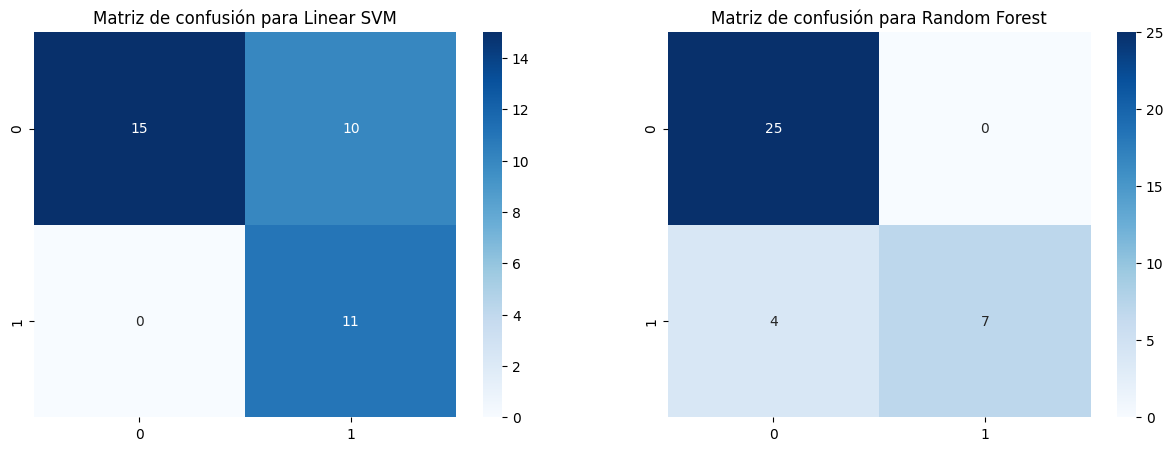

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(svm_confusion_matrix2, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de confusión para Linear SVM')

sns.heatmap(rf_confusion_matrix2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de confusión para Random Forest')

plt.show()

# **7. RESULTADOS E INTERPRETACIONES**

## **7.1 EVALUACIÓN DEL DESEMPEÑO DEL MODELO**

---
**COMPARACIÓN DE MODELOS DE AJUSTE 1 Y AJUSTE 2**

In [ ]:
print("MODELO DE AJUSTE 1")
print(results)
print("")
print("MODELO DE AJUSTE 2")
print(results2)

MODELO DE AJUSTE 1
          Modelo  Accuracy_train  Accuracy_test  Recall  F1-score  Precisión
0     Linear SVM        0.968085       0.722222     1.0    0.6875    0.52381
1  Random Forest        0.722222       0.722222     1.0    0.6875    0.52381

MODELO DE AJUSTE 2
          Modelo  Accuracy_train  Accuracy_test    Recall  F1-score  Precisión
0     Linear SVM        0.968085       0.722222  1.000000  0.687500    0.52381
1  Random Forest        0.888889       0.888889  0.636364  0.777778    1.00000


**Modelos de Ajuste 1:**

**Linear SVM:**

> **Accuracy_train:** El modelo tiene una precisión del 96.8% en los datos de entrenamiento.

> **Accuracy_test:** En los datos de prueba, el modelo tiene una precisión del 72.2%.

> **Recall:** Identifica correctamente todos los tweets positivos (100%).

> **F1-score:** Combina precisión y recall en una métrica única (68.8%).

> **Precisión:** De los tweets que clasifica como positivos, el 52.4% son realmente positivos.

Random Forest:

> **Accuracy_train:** La precisión en los datos de entrenamiento es del 72.2%.

> **Accuracy_test:** Similar al SVM, el modelo tiene una precisión del 72.2% en los datos de prueba.

> **Recall:** Al igual que el SVM, identifica correctamente todos los tweets positivos (100%).

> **F1-score:** Similar al SVM (68.8%).

> **Precisión:** De los tweets clasificados como positivos, el 52.4% son realmente positivos.

**Modelos de Ajuste 2:**

**Linear SVM:**

> **Accuracy_train:** La precisión en los datos de entrenamiento es del 96.8% (similar al ajuste 1).

> **Accuracy_test:** Igualmente, el modelo tiene una precisión del 72.2% en los datos de prueba.

> **Recall:** Nuevamente, identifica correctamente todos los tweets positivos (100%).

> **F1-score:** Al igual que en el ajuste 1 (68.8%).

> **Precisión:** De los tweets clasificados como positivos, el 52.4% son realmente positivos.

**Random Forest:**

> **Accuracy_train:** La precisión en los datos de entrenamiento ha aumentado al 88.9%.

> **Accuracy_test:** También ha mejorado al 88.9% en los datos de prueba.

> **Recall:** Ha disminuido al 63.6%, lo que indica que no identifica todos los tweets positivos.

> **F1-score:** Aunque ha aumentado al 77.8%, la disminución en recall sugiere que hay un equilibrio entre precisión y recall.

> **Precisión:** De los tweets clasificados como positivos, el 100% son realmente positivos.

## **7.2 INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN**

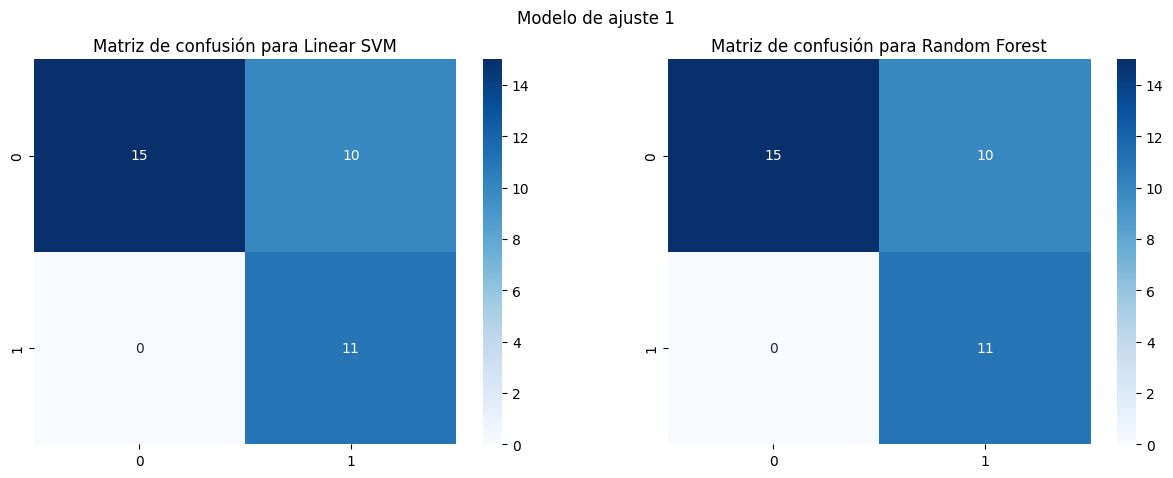

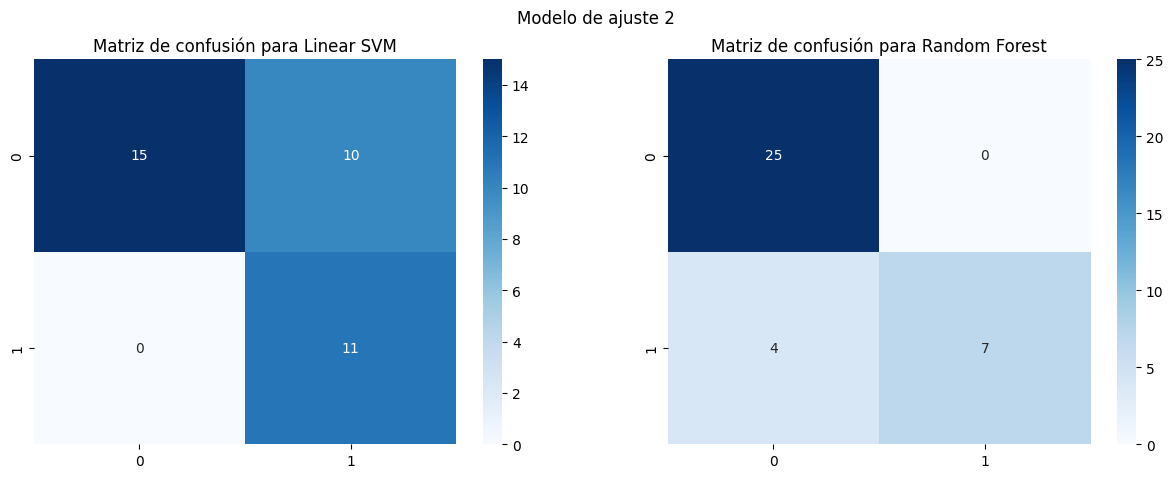

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de confusión para Linear SVM')
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de confusión para Random Forest')
plt.suptitle('Modelo de ajuste 1')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(svm_confusion_matrix2, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de confusión para Linear SVM')
sns.heatmap(rf_confusion_matrix2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de confusión para Random Forest')
plt.suptitle('Modelo de ajuste 2')
plt.show()

**Modelos de Ajuste 1:**

**Linear SVM:**

**Verdaderos Positivos (VP):** 11

**Falsos Positivos (FP):** 10

**Verdaderos Negativos (VN):** 15

**Falsos Negativos (FN):** 0

La mayoría de las predicciones están en la diagonal principal, lo que indica un buen rendimiento en la clasificación de tweets positivos y negativos. Sin embargo, hay 10 falsos positivos, lo que sugiere que el modelo a veces clasifica tweets como positivos cuando no lo son.

**Random Forest:**

Son las mismas interpretaciones deLinear SVM, ya que las matrices de confusión son idénticas. Ambos modelos están teniendo un rendimiento similar en términos de clasificación.

**Modelos de Ajuste 2:**

**Linear SVM:**

Las matrices de confusión son idénticas a las del ajuste 1, lo que sugiere que el rendimiento del Linear SVM no ha cambiado entre los dos ajustes.

**Random Forest:**

**Verdaderos Positivos (VP):** 7

**Falsos Positivos (FP):** 0

**Verdaderos Negativos (VN):** 25

**Falsos Negativos (FN):** 4

En comparación con el Random Forest del ajuste 1, este modelo ha mejorado su capacidad para clasificar verdaderos positivos (7 en lugar de 11), y ahora no tiene falsos positivos. Sin embargo, también tiene más falsos negativos (4), lo que indica que ahora hay tweets positivos que el modelo no está identificando.

# **8. CONCLUSIONES**

## **8.1 CONCLUSIÓN DE DATA WRANGLING**

El proceso de Data Wrangling desempeñó un papel crucial en la preparación de los datos para el análisis de sentimiento, asegurando la validez y la limpieza efectiva. La eliminación de columnas irrelevantes, la gestión de valores nulos, la detección y eliminación de duplicados, así como la conversión de formatos, fueron pasos esenciales que contribuyeron a la calidad de los datos.

La validación y limpieza de datos no solo eliminaron ruido y redundancias, sino que también garantizaron la coherencia de los datos, proporcionando una base sólida para el análisis subsiguiente. La detección y manejo de valores nulos se abordaron de manera proactiva, evitando posibles distorsiones en los resultados del análisis de sentimiento. Además, la conversión de cantidades a formatos numéricos más manejables facilitó la interpretación de los resultados y contribuyó a la coherencia del conjunto de datos.

La preparación adecuada de los datos para el análisis de sentimiento fue un aspecto fundamental del proyecto. La limpieza rigurosa y la transformación cuidadosa permitieron sortear posibles problemas que podrían haber afectado la precisión y la confiabilidad de los resultados. A pesar de los desafíos que puedan haber surgido, las decisiones tomadas durante el proceso de Data Wrangling fueron fundamentales para garantizar la calidad de los datos y la robustez de los análisis posteriores.

## **8.2 CONCLUSIÓN DE TRANSFORMACIÓN DEL DATASET**

**Limpieza y Tokenización Efectiva**

La fase de limpieza y tokenización ha demostrado ser crucial en la preparación de datos para el análisis de sentimiento. La eliminación de información innecesaria y la tokenización efectiva permitieron un procesamiento más eficiente en las etapas subsiguientes del proyecto. La consistencia y calidad de los datos mejoraron significativamente, facilitando la extracción de características y la construcción de modelos más precisos.

**Análisis Exploratorio de Datos Detallado**

El análisis exploratorio de datos proporcionó una visión profunda de la estructura y características del conjunto de datos. Se identificaron patrones significativos en la frecuencia de palabras, especialmente al analizar las palabras más utilizadas por cada usuario.

In [ ]:
palabras_conteo = Data_tidy.groupby(['Nick_Usuario', 'token'])['token'].count().reset_index(name='count')
top_palabras_por_usuario = palabras_conteo.groupby('Nick_Usuario').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
fig = px.bar(top_palabras_por_usuario, x='Nick_Usuario', y='count', text='token',
             title='Top 5 Palabras Más Utilizadas por Usuario',
             labels={'token': 'Palabra', 'count': 'Recuento'},
             color='token')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Palabras')
fig.update_layout(hovermode='x')
fig.show()

**Hallazgos Clave del Análisis Exploratorio de Datos**

**Tidy Data:** La organización limpia de los datos facilitó la interpretación y redujo la complejidad durante el análisis.

In [ ]:
Data_tidy

,Nombre_Usuario,Nick_Usuario,Fecha_deRespuesta,Cantidad_Reposteo,Cantidad_Visualizacion,token
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,habrá
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,corrupción
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,de
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,por
0,BuqueInsignia,@Erpintos,2023-10-10,43,43,medio
...,...,...,...,...,...,...
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,que
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,hay
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,es
207,Adlay Lacruz,@AJL196105,2023-10-10,10,10,terrorista


**Frecuencia de Palabras:** Se observaron patrones interesantes en la frecuencia de palabras, siendo las palabras totales por usuarios y palabras distintas por usuario, destacando términos dominantes.

In [ ]:
fig = px.bar(token_conteo, x='Nick_Usuario', y='token', text='token',
             title='Palabras totales por usuario',
             labels={'token': 'Recuento de Tokens', 'Nick_Usuario': 'Usuario'})
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Tokens')
fig.show()

In [ ]:
fig = px.bar(token_distinto, x='Nick_Usuario', y='token', text='token',
             title='Palabras distintas por usuario',
             labels={'token': 'Recuento de Tokens', 'Nick_Usuario': 'Usuario'})
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Usuario', yaxis_title='Recuento de Tokens')
fig.show()

**Stop Words y Correlación entre Nick_Usuario:** La identificación y tratamiento de palabras de paro, así como la exploración de correlaciones entre usuarios, contribuyeron a un análisis más profundo y específico.

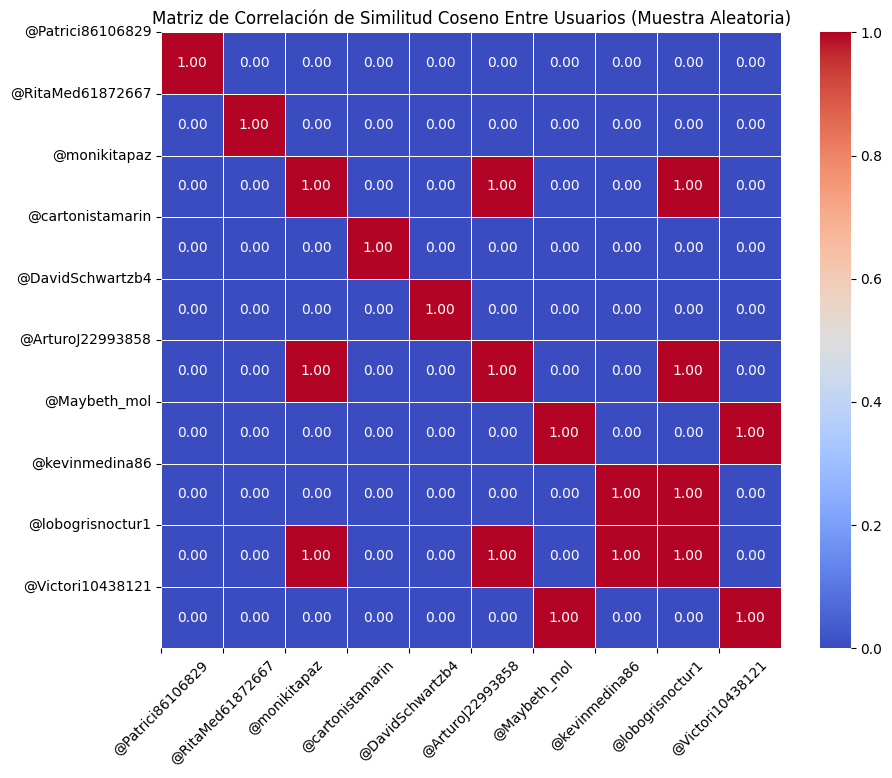

In [ ]:
muestra_usuarios = random.sample(usuario_columnas, k=10)
muestra_correlation_matrix = correlation_matrix.loc[muestra_usuarios, muestra_usuarios]
muestra_correlation_matrix = muestra_correlation_matrix.fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(muestra_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(range(len(muestra_usuarios)), muestra_usuarios, rotation=45)
plt.yticks(range(len(muestra_usuarios)), muestra_usuarios)
plt.title("Matriz de Correlación de Similitud Coseno Entre Usuarios (Muestra Aleatoria)")
plt.show()

## **8.3 CONCLUSIÓN DE ANALISIS DE SENTIMIENTO**

**Descargar Lexicon "Latin 1"**

La elección de un lexicon específico ("Latin 1") demostró ser relevante para la tarea de análisis de sentimiento. Este enfoque permitió una asignación más precisa de polaridades a las palabras, mejorando la calidad de la evaluación de sentimientos.

**Ejecución de Sentimiento**

La clasificación de tweets en positivos, negativos y neutros, junto con la asignación de puntuaciones, proporcionó una base sólida para el análisis posterior. La identificación de las palabras más utilizadas en diferentes categorías permitió una comprensión más profunda de las expresiones de sentimiento de los usuarios.

In [ ]:
fig = px.bar(top_palabras_positivas, x='count', y='token', color='Nick_Usuario', orientation='h')
fig.update_layout(
    barmode='stack',
    height=700,
    width=800,
    title='Palabras Positivas Más Usadas por Usuarios'
)
fig.show()

In [ ]:
fig = px.bar(top_palabras_negativas, x='count', y='token', color='Nick_Usuario', orientation='h')
fig.update_layout(
    barmode='stack',
    height=900,
    width=900,
    title='Palabras Negativas Más Usadas por Usuarios'
)
fig.show()

## **8.4 CONCLUSIÓN DE LA MATRIZ DE CONFUSIÓN**

**Linear SVM:**

Mantiene un rendimiento consistente entre los dos ajustes, con buenos resultados en la clasificación de tweets positivos y negativos, pero algunos falsos positivos.

**Random Forest:**

En el ajuste 2, ha mejorado la clasificación de verdaderos positivos eliminando los falsos positivos, pero ha introducido más falsos negativos.

## **8.5 CONCLUSIÓN DE ELECCIÓN DEL MODELO**

Considerando la importancia del recall en la aplicación (garantizar que se identifiquen correctamente todos los tweets positivos), el modelo Linear SVM en el Ajuste 2 parece ser una opción sólida. Aunque la precisión en los datos de prueba es del 72.2%, el recall es del 100%, lo que significa que está identificando todos los tweets positivos relacionados con el escandaloso evento de la elección de Cuba en el Consejo de Derechos Humanos.

La razón es que perder comentarios relevantes o críticos en el contexto podría tener consecuencias significativas. Aunque este modelo puede tener una tasa más alta de falsos positivos, clasificando algunos comentarios como relevantes cuando no lo son, la pérdida de comentarios importantes podría ser más perjudicial en este contexto.

# **9. RECOMENDACIONES**

Dado que el conjunto de datos es relativamente pequeño al realizar el submuestreo para abordar el desequilibrio de clases, es importante considerar la capacidad del modelo para generalizar a nuevos datos.

Además, el tamaño limitado del conjunto de datos, la estabilidad en el rendimiento del modelo y su capacidad para generalizar a nuevos datos se vuelven aún más críticos. En este contexto, la simplicidad del modelo y la falta de sobreajuste son aspectos clave a tener en cuenta.

Considerando esto y la necesidad de un buen recall, la recomendación previa de utilizar el modelo Linear SVM del Ajuste 2 sigue siendo sólida. Los SVM lineales tienden a funcionar bien en conjuntos de datos pequeños y pueden ser más estables en términos de generalización.

**Recomendación Actualizada:**

Utilizar el modelo Linear SVM del Ajuste 2, teniendo en cuenta las limitaciones del tamaño del conjunto de datos y la importancia de mantener la estabilidad del modelo en escenarios de baja cantidad de datos.

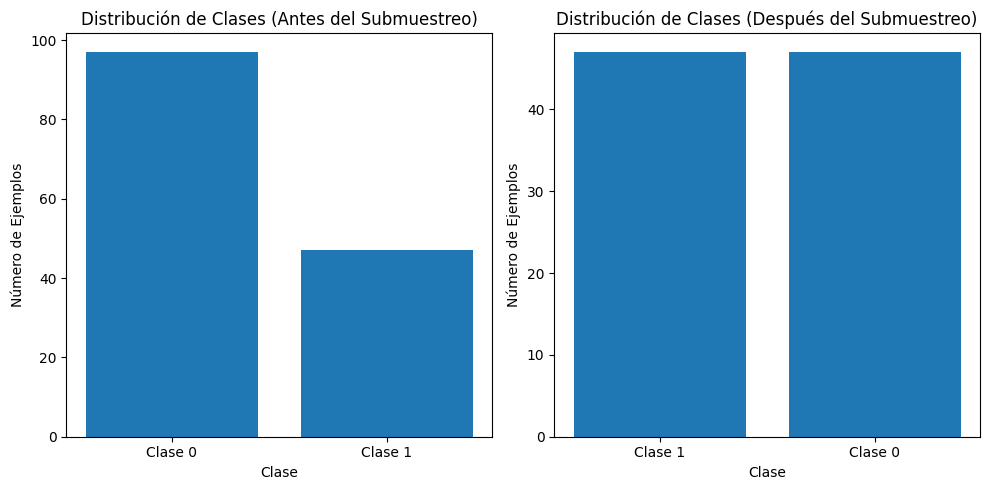

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.index, class_distribution_before.values)
plt.title('Distribución de Clases (Antes del Submuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.xticks(class_distribution_before.index, ['Clase 0', 'Clase 1'])
plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.index, class_distribution_after.values)
plt.title('Distribución de Clases (Después del Submuestreo)')
plt.xlabel('Clase')
plt.ylabel('Número de Ejemplos')
plt.xticks(class_distribution_after.index, ['Clase 0', 'Clase 1'])
plt.tight_layout()
plt.show()